In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import talib as ta
import numpy as np 
from talib import abstract
import pandas_datareader.data as web
from pandas_datareader import data,wb
import yfinance as yf
import mplfinance as fplt
import datetime as dt
from datetime import date, timedelta
import matplotlib.pyplot as plt
import seaborn as sns 
import math
import plotly.graph_objects as go
import plotly.express as px
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen, Request
import requests
import config

Index update

In [4]:
index = '^GSPC'
sp500 = yf.download(tickers=index,period='y',interval='15m')
df2 = pd.DataFrame(sp500)
sp500 = df2.to_csv('sp500.csv')
sp500 = pd.read_csv('sp500.csv')

[*********************100%***********************]  1 of 1 completed


In [6]:
sp = pd.DataFrame()

sp=yf.download(index,period='y',interval='15m')['Adj Close']

[*********************100%***********************]  1 of 1 completed


Separate; with user input for ticker below.

Stock(s) Data

In [17]:
#stock=input("Enter a stock ticker symbol: ")
stock = input('Ticker Symbol: ').upper()
# 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
# Retrieve stock data frame (df) from yfinance API at an interval of 1m 
#  yf.download(tickers=stock,period='y',interval='5m')
df = yf.download(stock,start='2023-05-01',end='2023-05-02',interval='1m')
df = pd.DataFrame(df)
df = df.to_csv('portfolio.csv')
df = pd.read_csv('portfolio.csv')

Ticker Symbol:  jpm
[*********************100%***********************]  1 of 1 completed


In [189]:
df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2023-04-05 09:30:00-04:00,126.800003,127.150002,126.459999,126.989998,126.989998,452519
1,2023-04-05 09:35:00-04:00,127.019997,127.320000,126.879997,127.055000,127.055000,162762
2,2023-04-05 09:40:00-04:00,127.050003,127.379997,126.900002,127.110001,127.110001,184924
3,2023-04-05 09:45:00-04:00,127.120003,127.690002,127.040001,127.540001,127.540001,136462
4,2023-04-05 09:50:00-04:00,127.540001,128.149994,127.480003,128.009995,128.009995,215854


In [191]:
df.tail()

,Datetime,Open,High,Low,Close,Adj Close,Volume
1356,2023-05-01 12:00:00-04:00,141.910004,142.380005,141.889999,142.380005,142.380005,154377
1357,2023-05-01 12:05:00-04:00,142.380005,142.539993,142.339996,142.509903,142.509903,158613
1358,2023-05-01 12:10:00-04:00,142.514999,142.539993,142.350006,142.470001,142.470001,110833
1359,2023-05-01 12:15:00-04:00,142.460007,142.720001,142.449997,142.539993,142.539993,131953
1360,2023-05-01 12:20:00-04:00,142.544998,142.690002,142.544998,142.679993,142.679993,40002


In [92]:
# df.rest_index() vs df.index()
data = df.index()

TypeError: 'RangeIndex' object is not callable

In [30]:
# renaming Datetime 
data.rename(columns={'Datetime':'time'})

,time,Open,High,Low,Close,Adj Close,Volume
0,2023-05-01 09:30:00,142.020004,142.839905,141.300003,141.848907,141.848907,3476710
1,2023-05-01 09:45:00,141.850006,142.279999,141.479996,141.729996,141.729996,1058696
2,2023-05-01 10:00:00,141.720001,142.039993,141.100006,141.880005,141.880005,1340501
3,2023-05-01 10:15:00,141.869995,142.469894,141.693695,142.240005,142.240005,1040637
4,2023-05-01 10:30:00,142.250000,143.130005,142.179993,143.119995,143.119995,1200841
5,2023-05-01 10:45:00,143.110001,143.360001,142.389694,142.414993,142.414993,863346
6,2023-05-01 11:00:00,142.399994,142.565002,142.339996,142.449997,142.449997,64739


Adding in moving average; googled the best EMA for 15 min chart since that is what I am using.

In [18]:
def print_data_chart():
    data['20EMA']=ta.EMA(data['Close'],20)
    data['5EMA']=ta.EMA(data['Close'],5)
    chart_data = go.Candestick(x=data['time'],open=data['Open'],high=data['High'],low=data['Low'],close=data['Close'])
    fig = go.Figure(data=[chart_data])
    ema_trace = go.scatter(x=data['time'],y=data['20EMA'],mode='lines',name='20EMA')
    fig.add_trace(ema_trace)
    fig.show()

In [37]:
print_data_chart()

AttributeError: module 'plotly.graph_objects' has no attribute 'Candestick'

# Dash Work

In [13]:
#stock=input("Enter a stock ticker symbol: ")
stock = input('Ticker Symbol: ').upper()
# 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
# Retrieve stock data frame (df) from yfinance API at an interval of 1m 
#  yf.download(tickers=stock,period='y',interval='5m')
df = yf.download(stock,start='2023-05-01',end='2023-05-02',interval='1m')
df = pd.DataFrame(df)
df = df.to_csv('portfolio.csv')
df = pd.read_csv('portfolio.csv')

df = pd.DataFrame(df)
df = df.to_csv('portfolio.csv')
df = pd.read_csv('portfolio.csv')

Ticker Symbol:  gme
[*********************100%***********************]  1 of 1 completed


In [14]:
data = pd.read_csv('portfolio.csv',index_col=0,parse_dates=True)
data.index.name='Datetime'

In [15]:
data['20EMA']=ta.EMA(data['Close'],20)
data['5EMA']=ta.EMA(data['Close'],5)
ema_lines = data[['5EMA','20EMA']]

In [16]:
# RSI
data['RSI'] = ta.RSI(data['Close'],14)
RSI_col = data['RSI']
RSI = fplt.make_addplot(RSI_col)

In [17]:
# Support and Resistance
pivot_point = (data['High'] + data['Low'] + data['Close']) / 3
data['support_l1'] = (pivot_point *2) - data['High']
data['support_l2'] = pivot_point - (data['High'] - data['Low'])
data['resistance_l1'] = (pivot_point * 2) - data['Low'] 
data['resistance_l2'] = pivot_point + (data['High'] - data['Low'])

In [18]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,20EMA,5EMA,RSI,support_l1,support_l2,resistance_l1,resistance_l2
Datetime,,,,,,,,,,,,,
2023-05-01 09:30:00-04:00,19.1600,19.200001,19.080000,19.0924,19.0924,49004,NaN,NaN,NaN,19.048266,19.004133,19.168267,19.244134
2023-05-01 09:31:00-04:00,19.0700,19.190001,19.070000,19.1800,19.1800,8261,NaN,NaN,NaN,19.103333,19.026666,19.223334,19.266668
2023-05-01 09:32:00-04:00,19.1600,19.190001,19.120001,19.1800,19.1800,3255,NaN,NaN,NaN,19.136667,19.093334,19.206667,19.233334
2023-05-01 09:33:00-04:00,19.1600,19.170000,19.139999,19.1600,19.1600,6225,NaN,NaN,NaN,19.143333,19.126666,19.173333,19.186667
2023-05-01 09:34:00-04:00,19.1423,19.200001,19.142300,19.1600,19.1600,3659,NaN,19.15448,NaN,19.134866,19.109732,19.192567,19.225135


In [19]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,20EMA,5EMA,RSI,support_l1,support_l2,resistance_l1,resistance_l2
Datetime,,,,,,,,,,,,,
2023-05-01 15:55:00-04:00,18.534901,18.549999,18.51,18.514999,18.514999,13967,18.592758,18.525134,29.549282,18.500000,18.485001,18.539999,18.564999
2023-05-01 15:56:00-04:00,18.510000,18.530001,18.50,18.520000,18.520000,20719,18.585829,18.523423,30.927244,18.503333,18.486666,18.533334,18.546668
2023-05-01 15:57:00-04:00,18.520000,18.540001,18.52,18.525000,18.525000,16216,18.580036,18.523949,32.351631,18.516666,18.508333,18.536667,18.548334
2023-05-01 15:58:00-04:00,18.530001,18.530001,18.50,18.500000,18.500000,21613,18.572413,18.515966,29.117911,18.490000,18.480000,18.520000,18.540001
2023-05-01 15:59:00-04:00,18.500000,18.559999,18.49,18.559999,18.559999,56440,18.571231,18.530644,43.670515,18.513333,18.466667,18.583333,18.606666


In [20]:
s1 = data['support_l1']
s2 = data['support_l2']
r1 = data['resistance_l1']
r2 = data['resistance_l2']

In [21]:
techs = [fplt.make_addplot(ema_lines, linestyle='dashdot'),
        fplt.make_addplot(RSI_col,panel=1,color='g',linestyle='dotted'),
        fplt.make_addplot(s1,color='red',linewidths=0),
        fplt.make_addplot(s2,color='tomato',linewidths=.1),
        fplt.make_addplot(r1,color='limegreen',linewidths=.1),
        fplt.make_addplot(r2,color='lawngreen',linewidths=.1)
]

Text(1.05, 0.76, ' 2023/05/01\nO: 18.50\nH: 18.56\nL: 18.49\nC: 18.56\nV: 56440\n')

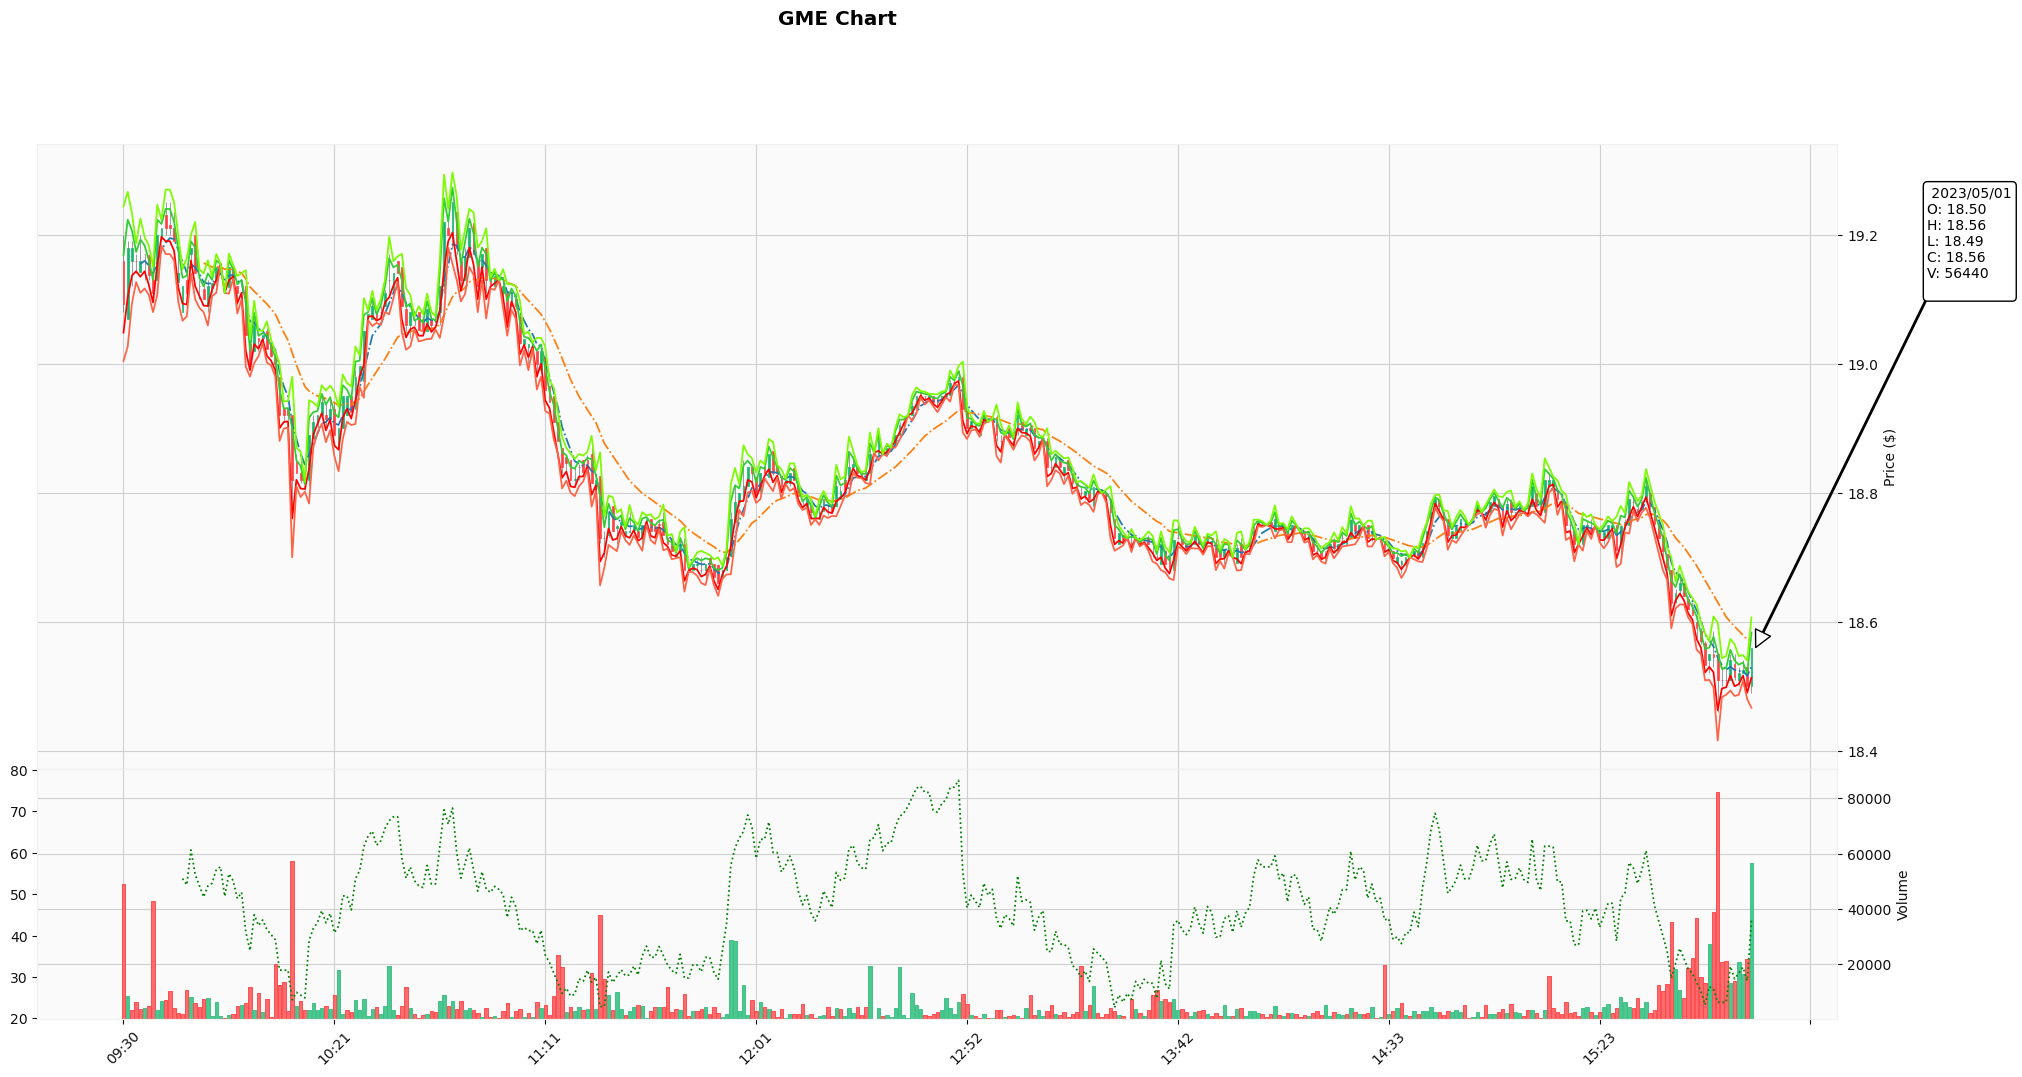

In [22]:
fig, axlist = fplt.plot(
    data,
    type='candle',
    title=f'{stock} Chart',
    ylabel='Price ($)',
    volume=True,
    style='yahoo',
    addplot=techs,
    figsize=(25,12.5),
    returnfig=True
)

last = data.iloc[-1,:]
text = (f" {last.name.date().strftime('%Y/%m/%d'):}\n"+
        f"O: {last['Open']:.2f}\n"+
        f"H: {last['High']:.2f}\n"+
        f"L: {last['Low']:.2f}\n"+
        f"C: {last['Close']:.2f}\n"+
        f"V: {last['Volume']:.0f}\n"
       )


axlist[0].annotate(text, xy=(len(df),last['Close']), textcoords='axes fraction', xytext=(1.05,0.76),
                   arrowprops=dict(facecolor='white',width=1),bbox=dict(boxstyle="round",fc="white"))

In [278]:
url = 'https://financialmodelingprep.com/api/v3/income-statement/JPM?limit=120&apikey=37aaac8c2789b881f4282cab85bba4cf'

from urllib.request import urlopen
import json

def get_jsonparsed_data(url):
    """
    Receive the content of ``url``, parse it as JSON and return the object.
    Parameters
    ----------
    url : str
    Returns
    -------
    dict
    """
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

In [23]:
import pandas as pd

pd.options.display.float_format = '{:,.2f}'.format

#pass ticker of the company

stock

api = config.api

# Request Financial Data from API and load to variables

IS = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{stock}?period=quarter&limit=400&apikey={api}').json()

BS = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?period=quarter&limit=400&apikey={api}').json()

CF = requests.get(f'https://financialmodelingprep.com/api/v3/cash-flow-statement/{stock}?period=quarter&limit=400&apikey={api}').json()

Ratios = requests.get(f'https://financialmodelingprep.com/api/v3/ratios/{stock}?limit=40&apikey={api}').json()

key_Metrics = requests.get(f'https://financialmodelingprep.com/api/v3/key-metrics/{stock}?limit=40&apikey={api}').json()

profile = requests.get(f'https://financialmodelingprep.com/api/v3/profile/{stock}?apikey={api}').json()

millions = 1000#000

#Create empty dictionary and add the financials to it

financials = {}

# dates = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
#for item in range(0,17):

dates = [2023,2022,2021,2020,2019]
for item in range(5):
    
    financials[dates[item]] ={}

    #Key Metrics
    financials[dates[item]]['Mkt Cap'] = key_Metrics[item]['marketCap'] 
    financials[dates[item]]['Debt to Equity'] = key_Metrics[item]['debtToEquity']
    financials[dates[item]]['Debt to Assets'] = key_Metrics[item]['debtToAssets']
    financials[dates[item]]['Revenue per Share'] = key_Metrics[item]['revenuePerShare']
    financials[dates[item]]['NI per Share'] = key_Metrics[item]['netIncomePerShare']
# Income Statement
    financials[dates[item]]['Revenue'] = IS[item]['revenue'] / millions
    financials[dates[item]]['Gross Profit'] = IS[item]['grossProfit'] / millions
    financials[dates[item]]['R&D Expenses'] = IS[item]['researchAndDevelopmentExpenses']/ millions
    financials[dates[item]]['Op Expenses'] = IS[item]['operatingExpenses'] / millions
    financials[dates[item]]['Op Income'] = IS[item]['operatingIncome'] / millions
    financials[dates[item]]['Net Income'] = IS[item]['netIncome'] / millions
# Balance Sheet
    financials[dates[item]]['Cash'] = BS[item]['cashAndCashEquivalents'] / millions
    financials[dates[item]]['Inventory'] = BS[item]['inventory'] / millions
    financials[dates[item]]['Cur Assets'] = BS[item]['totalCurrentAssets'] / millions
    financials[dates[item]]['LT Assets'] = BS[item]['totalNonCurrentAssets'] / millions
    financials[dates[item]]['Int Assets'] = BS[item]['intangibleAssets'] / millions
    financials[dates[item]]['Total Assets'] = BS[item]['totalAssets'] / millions
    financials[dates[item]]['Cur Liab'] = BS[item]['totalCurrentLiabilities'] / millions
    financials[dates[item]]['LT Debt'] = BS[item]['longTermDebt'] / millions
    financials[dates[item]]['LT Liab'] = BS[item]['totalNonCurrentLiabilities'] / millions
    financials[dates[item]]['Total Liab'] = BS[item]['totalLiabilities'] / millions
    financials[dates[item]]['SH Equity'] = BS[item]['totalStockholdersEquity'] / millions
# Cash Flow Statement
    financials[dates[item]]['CF Operations'] = CF[item]['netCashProvidedByOperatingActivities'] / millions
    financials[dates[item]]['CF Investing'] = CF[item]['netCashUsedForInvestingActivites'] / millions
    financials[dates[item]]['CF Financing'] = CF[item]['netCashUsedProvidedByFinancingActivities'] / millions
    financials[dates[item]]['CAPEX'] = CF[item]['capitalExpenditure'] / millions
    financials[dates[item]]['FCF'] = CF[item]['freeCashFlow'] / millions
    financials[dates[item]]['Dividends Paid'] = CF[item]['dividendsPaid'] / millions

    #Income Statement Ratios
    financials[dates[item]]['Gross Profit Margin'] = Ratios[item]['grossProfitMargin']
    financials[dates[item]]['Op Margin'] = Ratios[item]['operatingProfitMargin']
    financials[dates[item]]['Int Coverage'] = Ratios[item]['interestCoverage']
    financials[dates[item]]['Net Profit Margin'] = Ratios[item]['netProfitMargin']
    financials[dates[item]]['Dividend Yield'] = Ratios[item]['dividendYield']

    #BS Ratios
    financials[dates[item]]['Current Ratio'] = Ratios[item]['currentRatio']
    financials[dates[item]]['Operating Cycle'] = Ratios[item]['operatingCycle']
    financials[dates[item]]['Days of AP Outstanding'] = Ratios[item]['daysOfPayablesOutstanding']
    financials[dates[item]]['Cash Conversion Cycle'] = Ratios[item]['cashConversionCycle']

    #Return Ratios

    financials[dates[item]]['ROA'] = Ratios[item]['returnOnAssets']
    financials[dates[item]]['ROE'] = Ratios[item]['returnOnEquity']
    financials[dates[item]]['ROCE'] = Ratios[item]['returnOnCapitalEmployed']
    financials[dates[item]]['Dividend Yield'] = Ratios[item]['dividendYield']

    #Price Ratios

    financials[dates[item]]['PE'] = Ratios[item]['priceEarningsRatio']
    financials[dates[item]]['PS'] = Ratios[item]['priceToSalesRatio']
    financials[dates[item]]['PB'] = Ratios[item]['priceToBookRatio']
    financials[dates[item]]['Price To FCF'] = Ratios[item]['priceToFreeCashFlowsRatio']
    financials[dates[item]]['PEG'] = Ratios[item]['priceEarningsToGrowthRatio']
    financials[dates[item]]['EPS'] = IS[item]['eps']
    financials[dates[item]]['EPS'] = IS[item]['eps']

#Transform the dictionary into a Pandas
fundamentals = pd.DataFrame.from_dict(financials,orient='columns')

 #Calculate Growth measures
fundamentals['CAGR'] = ((fundamentals[2022]/fundamentals[2021])**(1/4) - 1)
fundamentals['2023 growth'] = (fundamentals[2023] - fundamentals[2022] )/ fundamentals[2022]
fundamentals['2022 growth'] = (fundamentals[2022] - fundamentals[2021] )/ fundamentals[2021]
fundamentals['2021 growth'] = (fundamentals[2021] - fundamentals[2020] )/ fundamentals[2020]
fundamentals['2020 growth'] = (fundamentals[2020] - fundamentals[2019] )/ fundamentals[2019]

# Export to CSV
fundamentals.to_csv('fundamentals.csv')

print(fundamentals)

                               2023         2022          2021         2020  \
Mkt Cap                6,941,844.00 7,108,266.00 21,125,000.00   336,000.00   
Debt to Equity                 1.35         1.18          4.66         3.61   
Debt to Assets                 0.58         0.54          0.82         0.78   
Revenue per Share             19.48        20.70         19.58        18.47   
NI per Share                  -1.03        -1.31         -0.83        -1.33   
Revenue                2,226,400.00 1,186,400.00  1,136,000.00 1,378,400.00   
Gross Profit             499,800.00   291,600.00    282,200.00   298,500.00   
R&D Expenses                   0.00         0.00          0.00         0.00   
Op Expenses              453,400.00   387,900.00    387,500.00   452,200.00   
Op Income                 46,200.00   -96,300.00   -105,300.00  -153,700.00   
Net Income                48,200.00   -94,700.00   -108,700.00  -157,900.00   
Cash                   1,139,000.00   803,800.00    

In [24]:
df = pd.read_csv('fundamentals.csv',index_col=0)

In [25]:
df.head(20)

,2023,2022,2021,2020,2019,CAGR,2023 growth,2022 growth,2021 growth,2020 growth
Mkt Cap,"6,941,844.00","7,108,266.00","21,125,000.00","336,000.00","1,147,604.00",-0.24,-0.02,-0.66,61.87,-0.71
Debt to Equity,1.35,1.18,4.66,3.61,2.03,-0.29,0.14,-0.75,0.29,0.78
Debt to Assets,0.58,0.54,0.82,0.78,0.67,-0.10,0.06,-0.34,0.05,0.17
Revenue per Share,19.48,20.70,19.58,18.47,20.29,0.01,-0.06,0.06,0.06,-0.09
NI per Share,-1.03,-1.31,-0.83,-1.33,-1.65,0.12,-0.22,0.59,-0.38,-0.19
Revenue,"2,226,400.00","1,186,400.00","1,136,000.00","1,378,400.00","2,253,900.00",0.01,0.88,0.04,-0.18,-0.39
Gross Profit,"499,800.00","291,600.00","282,200.00","298,500.00","378,200.00",0.01,0.71,0.03,-0.05,-0.21
R&D Expenses,0.00,0.00,0.00,0.00,0.00,NaN,NaN,NaN,NaN,NaN
Op Expenses,"453,400.00","387,900.00","387,500.00","452,200.00","538,900.00",0.00,0.17,0.00,-0.14,-0.16
Op Income,"46,200.00","-96,300.00","-105,300.00","-153,700.00","-160,700.00",-0.02,-1.48,-0.09,-0.31,-0.04


In [28]:
import json
from urllib.request import urlopen

# api_pull = input('What do you want to pull from the API? ')
# url = 'https://financialmodelingprep.com' + api_pull + '&apikey=37aaac8c2789b881f4282cab85bba4cf'
url = f'https://financialmodelingprep.com/api/v3/quote-short/{stock}?apikey={api}'
def get_jsonparsed_data(url):
    """
    Receive the content of ``url``, parse it as JSON and return the object.

    Parameters
    ----------
    url : str

    Returns
    -------
    dict
    """
    r = requests.get(url)
    r = r.json()
    return r
    r = r['real_time']
    r = pd.DataFrame.from_dict(r)
    r = r.T
    r.columns = r.iloc[0]


In [40]:
# API Request
response = requests.get(f'https://financialmodelingprep.com/api/v3/quote-short/{stock}?apikey={api}')
real_time_data = response.json()

# Use json_normalize to convert JSON data to a df
real_time_df = pd.json_normalize(real_time_data)
print(real_time_df.head())

  symbol  price  volume
0    GME  18.22  598803


In [362]:
real_time_price = requests.get(f'https://financialmodelingprep.com/api/v3/quote-short/{stock}?apikey={api}')
gen_fin_news = requests.get(f'https://financialmodelingprep.com/api/v4/stock-news-sentiments-rss-feed?page=0&apikey={api}')
stock_news = requests.get(f'https://financialmodelingprep.com/api/v3/stock_news?tickers={stock}&limit=50&apikey={api}')
#price target consensus
target_price_consensus = requests.get(f'https://financialmodelingprep.com/api/v4/price-target-consensus?symbol={stock}&apikey={api}')
#price target summary
price_target_summary = requests.get(f'https://financialmodelingprep.com/api/v4/price-target-summary?symbol={stock}&apikey={api}')
# target upgrades and downgrades
target_up_down = requests.get(f'https://financialmodelingprep.com/api/v4/upgrades-downgrades?symbol={stock}&apikey={api}')
# earnings
earnings = requests.get(f'https://financialmodelingprep.com/api/v3/historical/earning_calendar/{stock}?limit=80&apikey={api}')
# historical dividends
div_hist = requests.get(f'https://financialmodelingprep.com/api/v3/historical-price-full/stock_dividend/{stock}?apikey={api}')
# economic calender
econ_calendar = requests.get(f'https://financialmodelingprep.com/api/v3/economic_calendar?from=2023-01-01&to=2023-12-31&apikey={api}')
# company outlook USE INSTEAD OF PROFILE
company_outlook = requests.get(f'https://financialmodelingprep.com/api/v4/company-outlook?symbol={stock}&apikey={api}')
# stock grade
stock_grade = requests.get(f'https://financialmodelingprep.com/api/v3/grade/{stock}?limit=500&apikey={api}')
# quarterly analyst estimates
analyst_est = requests.get(f'https://financialmodelingprep.com/api/v3/analyst-estimates/{stock}?period=quarter&limit=30&apikey={api}')
# treasury rates
bond_rates = requests.get(f'https://financialmodelingprep.com/api/v4/treasury?from=2023-03-1&to=2023-05-10&apikey={api}')
# fed funds
fed_funds = requests.get(f'https://financialmodelingprep.com/api/v4/economic?name=federalFunds&from=2019-01-01&to=2023-05-10&apikey={api}')
# cpi
cpi = requests.get(f'https://financialmodelingprep.com/api/v4/economic?name=CPI&from=2019-10-10&to=2023-05-10&apikey={api}')
# real GDP
real_gdp = requests.get(f'https://financialmodelingprep.com/api/v4/economic?name=realGDP&from=2019-10-10&to=2023-05-10&apikey={api}')
# consumer sentiment
consumer_senti = requests.get(f'https://financialmodelingprep.com/api/v4/economic?name=consumerSentiment&from=2019-10-10&to=2023-05-10&apikey={api}')
# durableGoods
dur_goods = requests.get(f'https://financialmodelingprep.com/api/v4/economic?name=durableGoods&from=2019-10-10&to=2023-05-10&apikey={api}')
# smoothedUSRecessionProbabilities 
recession_prob = requests.get(f'https://financialmodelingprep.com/api/v4/economic?name=smoothedUSRecessionProbabilities &from=2019-10-10&to=2023-05-10&apikey={api}')
# 15YearFixedRateMortgageAverage
fifteen_fmort = requests.get(f'https://financialmodelingprep.com/api/v4/economic?name=15YearFixedRateMortgageAverage&from=2019-10-10&to=2023-05-10&apikey={api}')
# 30YearFixedRateMortgageAverage
thirty_fmort = requests.get(f'https://financialmodelingprep.com/api/v4/economic?name=30YearFixedRateMortgageAverage&from=2019-10-10&to=2023-05-10&apikey={api}')
# unemploymentRate
unem_rate = requests.get(f'https://financialmodelingprep.com/api/v4/economic?name=unemploymentRate&from=2019-10-10&to=2023-05-10&apikey={api}')
# retailSales
ret_sales = requests.get(f'https://financialmodelingprep.com/api/v4/economic?name=retailSales&from=2019-10-10&to=2023-05-10&apikey={api}')

In [261]:
df23 = df['2023']

In [262]:
df22 = df['2022']

In [263]:
df21 = df['2021']

In [264]:
df20 = df['2020']

In [326]:
print(mkt_cap)

2023          397,713.78
2022          478,454.53
2021          391,680.57
2020          449,077.10
2019          331,556.57
CAGR               -0.02
2023 growth        -0.17
2022 growth         0.22
2021 growth        -0.13
2020 growth         0.35
Name: Mkt Cap, dtype: float64


In [361]:
cash = df.loc['Cash']
cur_assets = df.loc['Cur Assets']
lt_assets = df.loc['LT Assets']
int_assets = df.loc['Int Assets']
total_assets = df.loc['Total Assets']
mkt_cap = df.loc['Mkt Cap']
de = df.loc['Debt to Equity']
da = df.loc['Debt to Assets']
rps = df.loc['Revenue per Share']
rev = df.loc['Revenue']
gp = df.loc['Gross Profit']
op_inc = df.loc['Op Income']
ni = df.loc['Net Income']
cur_lia = df.loc['Cur Liab']
lt_debt = df.loc['LT Debt']
lt_lia = df.loc['LT Liab']
tot_lia = df.loc['Total Liab']
sh_eq = df.loc['SH Equity']
cf_ops = df.loc['CF Operations']
cf_inv = df.loc['CF Investing']
cf_fin = df.loc['CF Financing']
fcf = df.loc['FCF']
div_paid = df.loc['Dividends Paid']
op_margin = df.loc['Op Margin']
int_cov = df.loc['Int Coverage']
npm = df.loc['Net Profit Margin']
div_yld = df.loc['Dividend Yield']
#Ratios
cur_ratio = df.loc['Current Ratio']
roa = df.loc['ROA']
roe = df.loc['ROE']
roce = df.loc['ROCE']
pe = df.loc['PE']
ps = df.loc['PS']
pb = df.loc['PB']
price_to_fcf = df.loc['Price To FCF']
peg = df.loc['PEG']
eps = df.loc['EPS']

In [ ]:
main_summary = 

In [43]:
from finance_library import myfunctions

ImportError: cannot import name 'myfunctions' from 'finance_library' (unknown location)

# Work on Pivot,S, and R output in table to watch

In [88]:
# https://medium.com/financial-data-analysis/using-yfinance-to-download-financial-data-python-57f2f31e0f9e
#stock=input("Enter a stock ticker symbol: ")
stock = input('Ticker Symbol: ').upper()
# 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo


#Getting a exact x period of days from today
            # specify start and end dates
end_date = date.today()
start_date = end_date - timedelta(days=366)
# days= (days in week*i) for i in range(weeks in a year since above is 365 days)
start_date_list = [start_date+timedelta(1*i) for i in range(366)]
end_date_list = [start_date+timedelta(1+i) for i in range(365)]+ [end_date]
# end_date_list = [start_date_list[i+1] - timedelta(days=1) for i in range(365)] + [end_date]
print(start_date_list)
print(end_date_list)

# using for-loop
for idx in range(366):
    data = yf.download(stock,
                     start = start_date_list[idx].strftime('%Y-%m-%d'),
                     end = end_date_list[idx].strftime('%Y-%m-%d'),
                     interval='1h')
                
    df_5min = pd.DataFrame(data).append(data)
df_5min

df_5min = pd.DataFrame(df_5min)

df_5min = df_5min.to_csv(f'{stock}_df_5min.csv')

[datetime.date(2022, 5, 2), datetime.date(2022, 5, 3), datetime.date(2022, 5, 4), datetime.date(2022, 5, 5), datetime.date(2022, 5, 6), datetime.date(2022, 5, 7), datetime.date(2022, 5, 8), datetime.date(2022, 5, 9), datetime.date(2022, 5, 10), datetime.date(2022, 5, 11), datetime.date(2022, 5, 12), datetime.date(2022, 5, 13), datetime.date(2022, 5, 14), datetime.date(2022, 5, 15), datetime.date(2022, 5, 16), datetime.date(2022, 5, 17), datetime.date(2022, 5, 18), datetime.date(2022, 5, 19), datetime.date(2022, 5, 20), datetime.date(2022, 5, 21), datetime.date(2022, 5, 22), datetime.date(2022, 5, 23), datetime.date(2022, 5, 24), datetime.date(2022, 5, 25), datetime.date(2022, 5, 26), datetime.date(2022, 5, 27), datetime.date(2022, 5, 28), datetime.date(2022, 5, 29), datetime.date(2022, 5, 30), datetime.date(2022, 5, 31), datetime.date(2022, 6, 1), datetime.date(2022, 6, 2), datetime.date(2022, 6, 3), datetime.date(2022, 6, 4), datetime.date(2022, 6, 5), datetime.date(2022, 6, 6), datet

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)




1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)




1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)




1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)




1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)




1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)




1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)




1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)




1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)




1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)




1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)




1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)




1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)




1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)




1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)




1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)




1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)




1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)




1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)




1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)




1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)
C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- JPM: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)



[*********************100%***********************]  1 of 1 completed

C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


C:\Users\mfreese\AppData\Local\Temp\ipykernel_20528\1715700168.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_5min = pd.DataFrame(data).append(data)


In [ ]:
df_5min = pd.read_csv(f'{stock}_df_5min.csv')
df_5min.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume
0,2023-05-02 09:30:00-04:00,141.399994,141.630005,140.880005,141.630005,141.630005,450204
1,2023-05-02 09:35:00-04:00,141.630005,142.410004,141.615005,141.929993,141.929993,395426
2,2023-05-02 09:40:00-04:00,141.899994,142.229996,141.520004,141.699997,141.699997,200786
3,2023-05-02 09:45:00-04:00,141.610001,141.839996,141.217499,141.259995,141.259995,177394
4,2023-05-02 09:50:00-04:00,141.229996,141.259995,140.770004,140.929993,140.929993,197509


In [ ]:
pivot_point = (df_5min['High'] + df_5min['Low'] + df_5min['Close']) / 3
df_5min['support_l1'] = (pivot_point *2) - df_5min['High']
df_5min['support_l2'] = pivot_point - (df_5min['High'] - df_5min['Low'])
df_5min['resistance_l1'] = (pivot_point * 2) - df_5min['Low'] 
df_5min['resistance_l2'] = pivot_point + (df_5min['High'] - df_5min['Low'])

KeyError: 'High'

In [ ]:
print(data)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-05-03  138.440002  138.668701  135.759995  135.979996  135.979996   

              Volume  support_l1  support_l2  resistance_l1  resistance_l2  
Date                                                                        
2023-05-03  12747511  134.937093   133.89419       137.8458     139.711604  


# Algo and backtesting

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pyfolio as pf
import datetime as dt
import pandas_datareader.data as web
import os
import warnings

# Ignore printing all warnings
warnings.filterwarnings('ignore')

# print all outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Forecasting

In [3]:
# Import libraries
import math
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (accuracy_score, 
  classification_report, 
  confusion_matrix, 
  f1_score, 
  mean_squared_error, precision_score,
  r2_score
) 
from sklearn.model_selection import train_test_split

import yfinance as yf

In [4]:
# Set display options
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 500)
pd.set_option('display.colheader_justify', 'left')
pd.set_option('display.precision', 3)

# Line break utility
str_lb = '\n \n'

In [92]:
class AssetData:

  """
  Provides various informational, cleaning, modeling, and visualization functions for processing financial asset data
  and predicting prices. Source data is downloaded from yfinance and then processed.

  Parameters
  ----------
  str_co_ticker : str, required
    Any valid asset symbol.

  str_period : str, required, default 'max'
    Time duration for data.
    Valid periods: '1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max'

  str_interval : str, required, default '1d'
    Time interval for data.
    Valid intervals: '1m', '2m', '5m', '15m', '30m', '60m', '90m', '1h', '1d', '5d', '1wk', '1mo', '3mo'

  update : bool, required, default False
    If True will download latest data and update csv file.
    If False will not download latest file data and will not update csv file.

  tpl_model_intervals : tuple, required, default ('1d', '1wk', '1mo')
     Tuple of valid intervals to run model.

  Methods
  ----------
  get_ticker
    Returns the asset ticker.
  
  get_period
    Returns the data time duration.
  
  get_interval
    Returns the data time interval.

  download_csv
    Downloads the data to a local csv file. First, checks to see if file exists at default google drive
    location. Then looks to __init__ method for update. If file already exists and update argument is False, 
    then existing file is not updated. If File already exists and update argument is True, then existing file is updated. 
    If file doesn't exist, it is downloaded. Prints message indicating operations that were performed.

  get_raw_dataframes
    Runs download_csv to check if file exists, needs updating, doesn't need updating, or needs downloading.
    Then creates dataframe from csv and performs basic cleaning processes. Returns the raw dataframe.

  explore_raw_dataframes
    Runs get_raw_dataframe and then prints basic dataframe information.

  get_clean_dataframes
    Runs get_raw_dataframe and then performs more advanced cleaning processes to prepare data from modeling.
    These include dropping unwanted features, renaming others, and creating price targets for classification
    and regression algorithms. 

  get_visual_data
    Runs get_clean_dataframes to prepare data. Then creates visualizations for optimizing feature selection including
    asset price line plot, feature correlation heatmap, pairplot, and feature and target pairplots, histograms, 
    and regplots.
  
  run_class_model
    Runs get_clean_dataframes to prepare data. Then splits data and runs random forest classification algorithm for 
    intervals passed by tpl_model_intervals. By default, prints various evaluation reports (bool_get_reports) 
    and dataframes (bool_get_dfs) for each modeled interval. Then summarizes results of all model runs and prints 
    dataframe and visualization.

  run_class_model_list
    Runs run_class_model for a tuple of asset tickers.

  run_mlr_model
    Runs get_clean_dataframes to prepare data. Then splits data and runs multiple linear regression algorithm for 
    intervals passed by tpl_model_intervals. By default, prints various evaluation reports (bool_get_reports) and 
    dataframes (bool_get_dfs) for each modeled interval. Then summarizes results of all model runs and prints 
    dataframe and visualization.

  run_mlr_model_list
    Runs run_mlr_model for a tuple of asset tickers.

  Example
  ----------
  AssetData('ibm').get_ticker()

  """

  def __init__(self, str_co_ticker, str_period='max', str_interval='1d', update=False, 
    tpl_model_intervals=('1d', '1wk', '1mo')):

    """
    Initializes the class

    Parameters
    ----------
    str_co_ticker : str, required
    Any valid asset symbol.

    str_period : str, required, default 'max'
      Time duration for data.
      Valid periods: '1d', '5d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max'

    str_interval : str, required, default '1d'
      Time interval for data.
      Valid intervals: '1m', '2m', '5m', '15m', '30m', '60m', '90m', '1h', '1d', '5d', '1wk', '1mo', '3mo'

    update : bool, required, default False
      If True will download latest data and update csv file.
      If False will not download latest file data and will not update csv file.

    tpl_model_intervals : tuple, required, default ('1d', '1wk', '1mo')
      Tuple of valid intervals to run model.

    NOTE: Data is downloaded to csv from yfinance given above paramters.
          Data is stored is default drive location indicated below.
    
    """      
    # Creates attributes for the class
    self.str_co_ticker = str_co_ticker
    self.str_period = str_period
    self.str_interval = str_interval
    self.str_drive_loc = '\\Users\\mfreese\\Downloads\\Side_work notes\\Investment\\'
    self.update = update
    self.tpl_model_intervals = list(tpl_model_intervals)
    self.lst_features_plots = ['open', 
      'high', 
      'low', 
      'close', 
      'volume', 
      'target_price', 
      'target_class'
    ]

    self.lst_features_model = ['open', 
      'high', 
      'low', 
      'close', 
      'volume', 
      # 'target_price', 
      # 'target_class'
    ]

    # Sets font paramters
    self.global_font = 10
    self.local_font = 12

  def get_ticker(self):
    
    """
    Gets the asset ticker.

    Returns
    ----------
    Ticker symbol.
    
    """

    return self.str_co_ticker

  def get_period(self):

    """
    Gets the data time period duration.

    Returns
    ----------
    Time period duration.
    
    """

    return self.str_period

  def get_interval(self):

    """
    Gets the data time interval.

    Returns
    ----------
    Time interval.
    
    """

    return self.str_interval

  def download_csv(self):

    """
    Downloads the data to a local csv file. First, checks to see if file exists at default google drive
    location. If file already exists and update argument is False, then existing file is not updated. If File 
    already exists and update argument is True, then existing file is updated. If file doesn't exist, it is downloaded.
    Prints message indicating operations that were performed.

    """

    update = self.update
    
    # Assigns varible for file path and checks if it exists
    str_save_to_input = (self.str_drive_loc + self.str_co_ticker  + '-price-data-' + self.str_period + '-' + 
      self.str_interval + '.csv')
    
    if Path(str_save_to_input).exists() is True and update is True:
      print(f'FILE EXISTS: {str(Path(str_save_to_input))} UPDATE: YES{str_lb}')
      yf.download(self.str_co_ticker, period=self.str_period, interval=self.str_interval).to_csv(str_save_to_input)

    elif Path(str_save_to_input).exists() is True and update is False:
      print(f'FILE EXISTS: {str(Path(str_save_to_input))} UPDATE: NO{str_lb}')

    elif Path(str_save_to_input).exists() is False:
      print(f'FILE DOES NOT EXIST: {str(Path(str_save_to_input))} DOWNLOADED: YES{str_lb}')
      yf.download(self.str_co_ticker, period=self.str_period, interval=self.str_interval).to_csv(str_save_to_input)
    
    return
  
  def get_raw_dataframes(self):

    """
    Runs download_csv to check if file exists, needs updating, doesn't need updating, or needs downloading.
    Then creates dataframe from csv and performs basic cleaning processes.
    Returns the raw dataframe.
    
    Returns
    ----------
    Raw dataframe.

    """
    # Runs download_csv method
    self.download_csv()

    # Assigns variable and gets raw dataframe
    str_save_to_input = (self.str_drive_loc + self.str_co_ticker  + '-price-data-' + self.str_period + '-' + 
      self.str_interval + '.csv')
    df = pd.read_csv(str_save_to_input, index_col=['Date'], parse_dates=['Date'])
    
    return df

  def explore_raw_dataframes(self):

    """
    Runs get_raw_dataframe and then prints basic dataframe information.

    """
    # Assigns variable and runs get_raw_dataframes method
    df = self.get_raw_dataframes()
    
    # Explore data
    df.info()

    # Prints dataframe information
    print(f'df.head(): {str_lb}{df.head()}{str_lb}',    
      f'df.shape: {str_lb}{df.shape}{str_lb}',
      f'df.describe(): {str_lb}{df.describe()}{str_lb}',
      f'df.corr(method="pearson"): {str_lb}{df.corr(method="pearson")}{str_lb}'
    )

    return

  def get_clean_dataframes(self):

    """
    Runs get_raw_dataframe and then performs more advanced cleaning processes to prepare data from modeling.
    These include dropping unwanted features, renaming others, and creating price targets for classification
    and regression algorithms. 

    """
    # Assigns variable and runs get_raw_dataframes method
    df = self.get_raw_dataframes()

    # Drops and renames columns, renames index
    df.drop(['Adj Close'], axis=1, inplace=True)
    dict_rename = ({'Open':'open',
      'High':'high', 
      'Low':'low', 
      'Close':'close', 
      'Volume':'volume', 
    })
    df.rename(columns=dict_rename, inplace=True)
    df.index.rename('date', inplace=True)

    # Create target price and target class price from next period's close
    df['target_price'] = df['close'].shift(-1)
    df['target_class'] = np.where(df.target_price > df.close, 1, 0)

    # Slices the dataframe up one period to avoid target price null calculation 
    df = df.iloc[:-1]

    # Copies dataframe
    df = df.copy()
    
    return df
   
  def get_visual_data(self):

    """
    Runs get_clean_dataframes to prepare data. Then creates visualizations for optimizing feature selection including
    asset price line plot, feature correlation heatmap, pairplot, and feature and target pairplots, histograms, 
    and regplots.

    """

    # Sets plot options
    plt.style.use('fivethirtyeight')
    sns.set_style("whitegrid")

    # Assigns global font size
    plt.rcParams['font.size'] = self.global_font

    # Assigns variable and runs get_raw_dataframes method
    df = self.get_clean_dataframes()

    # Creates line plot and correlation heatmap
    fig = plt.figure(figsize=(13.6, 4))
    fig.subplots_adjust(wspace=0.50, hspace=0.50) 

    # Creates price line plot
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(df.close, label='Close', linewidth=1)
    ax.set_title(f'Price', fontsize=self.local_font)
    ax.legend(loc='upper left')
    
    # Creates correlation heatmap
    ax = fig.add_subplot(1, 2, 2)
    ax.set_title(f'Feature Correlation Heatmap', fontsize=self.local_font)
    sns.heatmap(df.corr(method = 'pearson'), cmap='Oranges', center=1, annot=True, fmt='.2f', linewidth=0.5)
    fig.suptitle(f'{str_lb}MODEL ASSET: {self.str_co_ticker}  PERIOD: {self.str_period} INTERVAL: {self.str_interval}', 
      y=1.10, fontsize=self.local_font)
    plt.show()
    print(str_lb)

    # Assigns number of records to visualize pairplot
    int_rows = 10

    # Creates pairplot of features list
    sns.set(font_scale=0.75)
    ax = sns.pairplot(df[-int_rows:], hue='target_price', vars=self.lst_features_plots, diag_kind='kde')
    ax.fig.set_size_inches(11.9, 7)
    ax.fig.suptitle(f'Feature and Target Pairplots (Records: {int_rows})', y=1.05, fontsize=self.local_font)
    plt.show()
    print(str_lb)

    # Creates histograms of features list
    fig = plt.figure(figsize=(13.2, 5))
    int_rows = math.ceil((len(self.lst_features_plots)/2))
      
    for int_index, str_feature in enumerate(self.lst_features_plots):
      
      ax = fig.add_subplot(int_rows, 2, int_index + 1)
      ax.hist(df[str_feature], bins=50, color='green', edgecolor='black')
      ax.set_title(str_feature, fontsize=self.local_font)
      plt.subplots_adjust(hspace=0.75, wspace=0.25)
      fig.suptitle(f'Feature and Target Histograms', y=1.10, fontsize=self.local_font)
    
    plt.show()
    print(str_lb)

    # Creates regplots of features and target
    fig = plt.figure(figsize=(13.2, 5))
    int_rows = math.ceil((len(self.lst_features_plots)/2))
      
    for int_index, str_feature in enumerate(self.lst_features_plots):
      
      ax = fig.add_subplot(int_rows, 2, int_index + 1)
      sns.regplot(x=df[str_feature], y=df['target_price'], color='blue', line_kws={'color': 'red', 'lw': 3})
      plt.subplots_adjust(hspace=0.75, wspace=0.25)
      fig.suptitle(f'Feature and Target Regplots', y=1.10, fontsize=self.local_font)
    
    plt.show()
    
    return

  def run_class_model(self, bool_get_reports=True, bool_get_dfs=True):

    """
    Runs get_clean_dataframes to prepare data. Then splits data and runs random forest classification algorithm for 
    intervals passed by tpl_model_intervals. By default, prints various evaluation reports (bool_get_reports) and 
    dataframes (bool_get_dfs) for each modeled interval. Then summarizes results of all model runs and prints 
    dataframe and visualization.

    Parameters
    ----------
    bool_get_reports : bool, default True
      If True will print various evaluation reports.
    
    bool_get_dfs : bool, default True
      If True, will print evaluation dataframes.
    ----------
    
    """
    
    # Creates lists for scores
    lst_int = []
    lst_flt_accuracy_score = []
    lst_f1_score = []
    lst_flt_precision_score = []
    lst_flt_score = []

    # Creates list for valid periods for running model
    lst_valid_periods = ['3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']

    # Loops through intervals and run model
    for interval in self.tpl_model_intervals:
            
      # Assigns an interval to class attribute
      self.str_interval = interval

      # Checks for valid period
      if self.str_period not in lst_valid_periods:
        print(f'Please select a valid period and execute run_class_model() again: {str_lb}{lst_valid_periods}{str_lb}')
        return

      # Prints model asset, period, and interval
      print(f'{str_lb}MODEL ASSET: {self.str_co_ticker} PERIOD: {self.str_period} INTERVAL: {self.str_interval}')

      # Gets clean dataframe for model 
      df = self.get_clean_dataframes()

      # Creates the training and test sets
      X = df[self.lst_features_model]
      y = df.target_class

      # Manually splits sets by date to avoid leakage and then randomize
      flt_train_pct = 0.70
      flt_train_size = int(len(X)*flt_train_pct)

      X_train = X.iloc[:flt_train_size].sample(frac=1, random_state=0).copy()
      X_test = X.iloc[flt_train_size:].sample(frac=1, random_state=0).copy()

      y_train = y.iloc[:flt_train_size].sample(frac=1, random_state=0).copy()
      y_test = y.iloc[flt_train_size:].sample(frac=1, random_state=0).copy()

      # Creatse the model using random forest classification
      rf_model_price_data = RandomForestClassifier()

      # Trains the model
      rf_model_price_data.fit(X_train, y_train)

      # Predicts asset values for the test set
      y_hat = rf_model_price_data.predict(X_test)

      # Creates new dataframe comparing actual and predicted results
      df_pred = X_test.copy()
      df_pred['target_class'] = y
      df_pred['target_pred'] = y_hat
      df_pred = df_pred.sort_index()

      # Evaluates the results
      flt_accuracy_score = accuracy_score(y_test, y_hat)
      flt_f1_score = f1_score(y_test, y_hat, average='macro')
      flt_precision_score = precision_score(y_test, y_hat)
      flt_score = rf_model_price_data.score(X_test, y_test)

      # Creates lists for summary scores and dataframes
      lst_int.append(interval)
      lst_flt_accuracy_score.append(flt_accuracy_score)
      lst_f1_score.append(flt_f1_score)
      lst_flt_precision_score.append(flt_precision_score)
      lst_flt_score.append(flt_score)

      # Creates dictionary to store evaluation results
      dict_scores = {'lst_flt_accuracy_score':lst_flt_accuracy_score,
        'lst_f1_score':lst_f1_score,
        'lst_flt_precision_score':lst_flt_precision_score,
        'lst_flt_score':lst_flt_score
      }

      # Boolean optional attribute for running reports and visualizations
      if bool_get_reports is True:
        print(f'Classification Report:{str_lb}{classification_report(y_test, y_hat, zero_division=1)}{str_lb}')
        print(f"Crosstab Confusion Matrix:{str_lb}{pd.crosstab(df_pred.target_class, df_pred.target_pred, rownames=['Actual Classification'], colnames=['Predicted Classification'])}{str_lb}")
        plt.rcParams['font.size'] = self.global_font
        fig = plt.figure(figsize=(13.6, 4))
        ax = fig.add_subplot()
        arr_conf_matrix = confusion_matrix(df_pred.target_class, df_pred.target_pred)
        sns.heatmap(arr_conf_matrix, cmap='Greens', center=1, annot=True, fmt='.1f', linewidth=0.5, xticklabels=['1', '2'], yticklabels=['1', '2'])
        ax.set_xlabel('Actual Classification')
        ax.set_ylabel('Predicted Classification')
        ax.set_title(f'Predicted vs Actual Asset Values Classification Model Confusion Matrix{str_lb}MODEL ASSET: {self.str_co_ticker} ' 
          f'PERIOD: {self.str_period} INTERVAL: {self.str_interval}', fontsize=self.local_font)
        plt.show()
        print(str_lb)

      # Boolean optional attribute for printing dataframes
      if bool_get_dfs is True:
        print(f'Feature, Target and Prediction Comparison: {str_lb}{df_pred.tail(10)}{str_lb}')

    # Prints a dataframe of scores
    df_score_comp_class = pd.DataFrame.from_dict(dict_scores, orient='index', columns=lst_int)
    print(f'Predicted vs Actual Asset Values Score Summary: {str_lb}{df_score_comp_class}{str_lb}')

    # Visualizes summary scores
    plt.rcParams['font.size'] = self.global_font
    fig = plt.figure(figsize=(13.6, 4))
    ax = fig.add_subplot()
    df_score_comp_class.plot(kind='bar', ax=ax, linewidth=2)
    ax.set_title(f'Predicted vs Actual Asset Values Score Summary{str_lb}MODEL ASSET: {self.str_co_ticker}', fontsize=self.local_font)
    ax.legend(loc='upper left')
    plt.show()
    print(str_lb)

    return 

  def run_class_model_list(self, tpl_assets):

    """
    Runs run_class_model for a tuple of asset tickers.

    """  

    lst_assets = list(tpl_assets)
    lst_assets.append(self.str_co_ticker)
                  
    for asset in lst_assets:
       self.str_co_ticker = asset
       print(self.run_class_model())
    
    return

  def run_mlr_model(self, bool_get_reports=True, bool_get_dfs=True):

    """
    Runs get_clean_dataframes to prepare data. Then splits data and runs multiple linear regression algorithm for 
    intervals passed by tpl_model_intervals. By default, prints various evaluation reports (bool_get_reports) and 
    dataframes (bool_get_dfs) for each modeled interval. Then summarizes results of all model runs and prints 
    dataframe and visualization.

    """
    
    # Creates lists for scores
    lst_int = []
    lst_flt_score = []
    lst_flt_r2_score = []
    lst_flt_mse = []

    # Creates list for valid periods for running model
    lst_valid_periods = ['3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max']

    # Loops through intervals and run model
    for interval in self.tpl_model_intervals:
            
      # Assigns an interval to class attribute
      self.str_interval = interval

      # Checks for valid period
      if self.str_period not in lst_valid_periods:
        print(f'Please select a valid period and execute run_mlr_model() again: {str_lb}{lst_valid_periods}{str_lb}')
        return

      # Prints model asset, period, and interval
      print(f'{str_lb}MODEL ASSET: {self.str_co_ticker} PERIOD: {self.str_period} INTERVAL: {self.str_interval}')

      # Gets clean dataframe for model 
      df = self.get_clean_dataframes()

      # Creates the training and test sets
      X = df[self.lst_features_model]
      y = df.target_price

      # Manually splits sets by date to avoid leakage and then randomize
      flt_train_pct = 0.75
      flt_train_size = int(len(X)*flt_train_pct)

      X_train = X.iloc[:flt_train_size].sample(frac=1, random_state=0).copy()
      X_test = X.iloc[flt_train_size:].sample(frac=1, random_state=0).copy()

      y_train = y.iloc[:flt_train_size].sample(frac=1, random_state=0).copy()
      y_test = y.iloc[flt_train_size:].sample(frac=1, random_state=0).copy()

      # Creates the model using multiple linear regression
      mlr_model_price_data = LinearRegression()

      # Trains the model
      mlr_model_price_data.fit(X_train, y_train)

      # Predicts asset values for test set
      y_hat = mlr_model_price_data.predict(X_test)

      # Creates new dataframe comparing actual and predicted results
      df_pred = X_test.copy()
      df_pred['target_price'] = y
      df_pred['target_pred'] = y_hat
      df_pred = df_pred.sort_index()

      # Evaluates the results
      flt_score = mlr_model_price_data.score(X_test, y_test)
      flt_r2_score = r2_score(y_test, y_hat)
      flt_mse = mean_squared_error(y_test, y_hat)

      # Creates lists for summary scores and dataframes
      lst_int.append(interval)
      lst_flt_score.append(flt_score)
      lst_flt_r2_score.append(flt_r2_score)
      lst_flt_mse.append(flt_mse)

      # Creates dictionary to store evaluation results
      dict_scores = {'lst_flt_score':lst_flt_score,
        'lst_flt_r2_score':lst_flt_r2_score,
        'lst_flt_mse':lst_flt_mse,
      }

      # Boolean optional attribute for running reports and visualizations
      if bool_get_reports is True:
        print(f'Model Coefficents: {str_lb}{mlr_model_price_data.coef_}{str_lb}')
        print(f'Model Intercept: {str_lb}{mlr_model_price_data.intercept_}{str_lb}')

        # Plot the results
        plt.rcParams['font.size'] = self.global_font
        fig = plt.figure(figsize=(13.6, 4))
        ax = fig.add_subplot()
        x = df_pred.index
        y = df_pred.target_price
        y_hat = df_pred.target_pred
        ax.plot(x, y, color='g', label='target_price', linestyle='-', linewidth=2)
        ax.plot(x, y_hat, color='b', label='target_pred', linestyle=':', linewidth=2)
        ax.set_title(f'Predicted vs Actual Asset Values Using Multiple Regression{str_lb}MODEL ASSET: {self.str_co_ticker} '
          f'PERIOD: {self.str_period} INTERVAL: {self.str_interval}', fontsize=self.local_font)
        ax.legend(loc='upper left')
        plt.show()
        print(str_lb)

      # Boolean optional attribute for printing dataframes
      if bool_get_dfs is True:
        print(f'Feature, Target and Prediction Comparison: {str_lb}{df_pred.tail(10)}{str_lb}')

    # Prints a dataframe of scores
    df_score_comp_class = pd.DataFrame.from_dict(dict_scores, orient='index', columns=lst_int)
    print(f'Predicted vs Actual Asset Values Score Summary: {str_lb}{df_score_comp_class}{str_lb}')

    # Visualizes summary scores
    plt.rcParams['font.size'] = self.global_font
    fig = plt.figure(figsize=(13.6, 6))
    ax = fig.add_subplot(3, 1, 1)
    df_score_comp_class.loc['lst_flt_score':'lst_flt_r2_score'].plot(kind='bar', ax=ax)
    ax.legend(loc='upper left')
    ax = fig.add_subplot(3, 1, 3)
    df_score_comp_class.loc['lst_flt_mse':'lst_flt_mse'].plot(kind='bar', ax=ax)
    ax.legend(loc='upper left')
    fig.suptitle(f'Predicted vs Actual Asset Values Score Summary{str_lb}MODEL ASSET: {self.str_co_ticker}', y=1.05, fontsize=self.local_font)
    plt.show()
    print(str_lb)
    
    import datetime

    # Calculate tomorrow's date
    tomorrow = datetime.date.today() + datetime.timedelta(days=1)

    # Assuming `df_pred` is your dataframe containing the previous predictions
    # Assuming `features` is a dataframe containing the features for tomorrow's prediction

    # Make the prediction for tomorrow's price
    tomorrow_pred = mlr_model_price_data.predict(y_hat)

    # Add the prediction to the `df_pred` dataframe
    df_pred.loc[tomorrow, 'Prediction'] = tomorrow_pred

    print(df_pred)
    return 

  def run_mlr_model_list(self, tpl_assets):

    """
    Runs run_mlr_model for a tuple of asset tickers.

    """
    # Creates of list of assets
    lst_assets = list(tpl_assets)
    lst_assets.append(self.str_co_ticker)
    
    # Loops through asset list and runs run_mlr_model method 
    for asset in lst_assets:
      self.str_co_ticker = asset
      print(self.run_mlr_model())

    return

In [51]:
str_co_ticker_1 = '^IXIC'
str_co_ticker_2 = 'NVDA'

In [52]:
AssetData(str_co_ticker_1).get_ticker()

'^IXIC'

In [53]:
AssetData(str_co_ticker_1).get_period()

'max'

In [54]:
AssetData(str_co_ticker_1).get_interval()


'1d'

In [55]:
AssetData(str_co_ticker_2).download_csv()

FILE EXISTS: \Users\mfreese\Downloads\Side_work notes\Investment\NVDA-price-data-max-1d.csv UPDATE: NO
 



In [56]:
AssetData(str_co_ticker_1).get_raw_dataframes()

FILE EXISTS: \Users\mfreese\Downloads\Side_work notes\Investment\^IXIC-price-data-max-1d.csv UPDATE: NO
 



,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1971-02-05,100.00,100.000,100.000,100.000,100.000,0
1971-02-08,100.84,100.840,100.840,100.840,100.840,0
1971-02-09,100.76,100.760,100.760,100.760,100.760,0
1971-02-10,100.69,100.690,100.690,100.690,100.690,0
1971-02-11,101.45,101.450,101.450,101.450,101.450,0
...,...,...,...,...,...,...
2023-05-23,12652.88,12709.740,12554.430,12560.250,12560.250,4347440000
2023-05-24,12481.89,12529.630,12415.850,12484.160,12484.160,359790000
2023-05-25,12706.44,12736.920,12604.890,12698.090,12698.090,4651640000


In [57]:
AssetData(str_co_ticker_1).explore_raw_dataframes()

FILE EXISTS: \Users\mfreese\Downloads\Side_work notes\Investment\^IXIC-price-data-max-1d.csv UPDATE: NO
 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13193 entries, 1971-02-05 to 2023-05-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       13193 non-null  float64
 1   High       13193 non-null  float64
 2   Low        13193 non-null  float64
 3   Close      13193 non-null  float64
 4   Adj Close  13193 non-null  float64
 5   Volume     13193 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 721.5 KB
df.head(): 
 
            Open    High    Low     Close   Adj Close  Volume
Date                                                         
1971-02-05  100.00  100.00  100.00  100.00  100.00     0     
1971-02-08  100.84  100.84  100.84  100.84  100.84     0     
1971-02-09  100.76  100.76  100.76  100.76  100.76     0     
1971-02-10  100.69  100.69  100.69  100.69  100.69     0     
1971-02-11

In [58]:
AssetData(str_co_ticker_1).get_clean_dataframes()

FILE EXISTS: \Users\mfreese\Downloads\Side_work notes\Investment\^IXIC-price-data-max-1d.csv UPDATE: NO
 



,open,high,low,close,volume,target_price,target_class
date,,,,,,,
1971-02-05,100.00,100.00,100.00,100.00,0,100.840,1
1971-02-08,100.84,100.84,100.84,100.84,0,100.760,0
1971-02-09,100.76,100.76,100.76,100.76,0,100.690,0
1971-02-10,100.69,100.69,100.69,100.69,0,101.450,1
1971-02-11,101.45,101.45,101.45,101.45,0,102.050,1
...,...,...,...,...,...,...,...
2023-05-22,12664.44,12756.23,12655.26,12720.78,4278920000,12560.250,0
2023-05-23,12652.88,12709.74,12554.43,12560.25,4347440000,12484.160,0
2023-05-24,12481.89,12529.63,12415.85,12484.16,359790000,12698.090,1


FILE EXISTS: \Users\mfreese\Downloads\Side_work notes\Investment\^IXIC-price-data-max-1d.csv UPDATE: NO
 



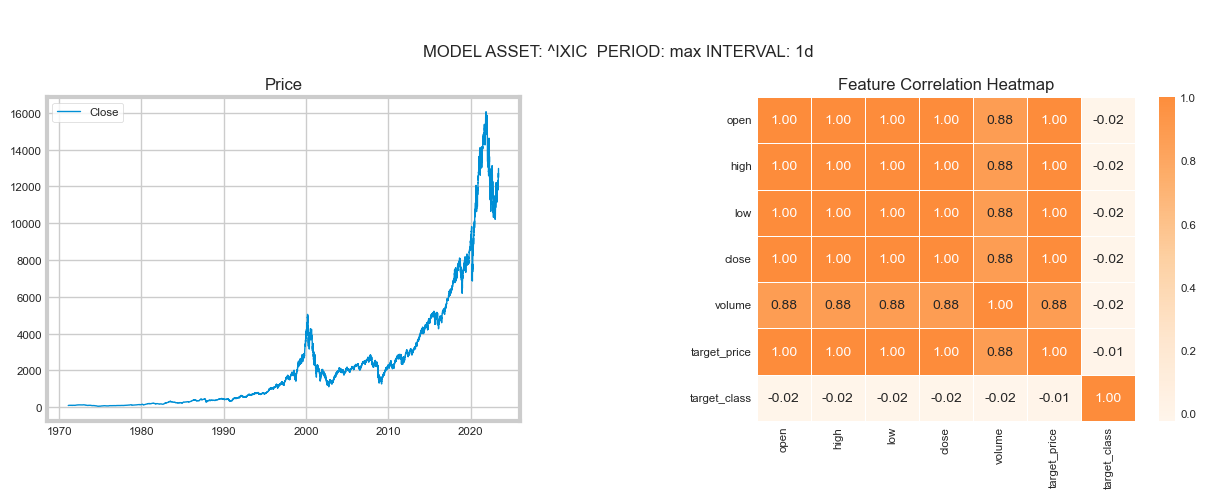

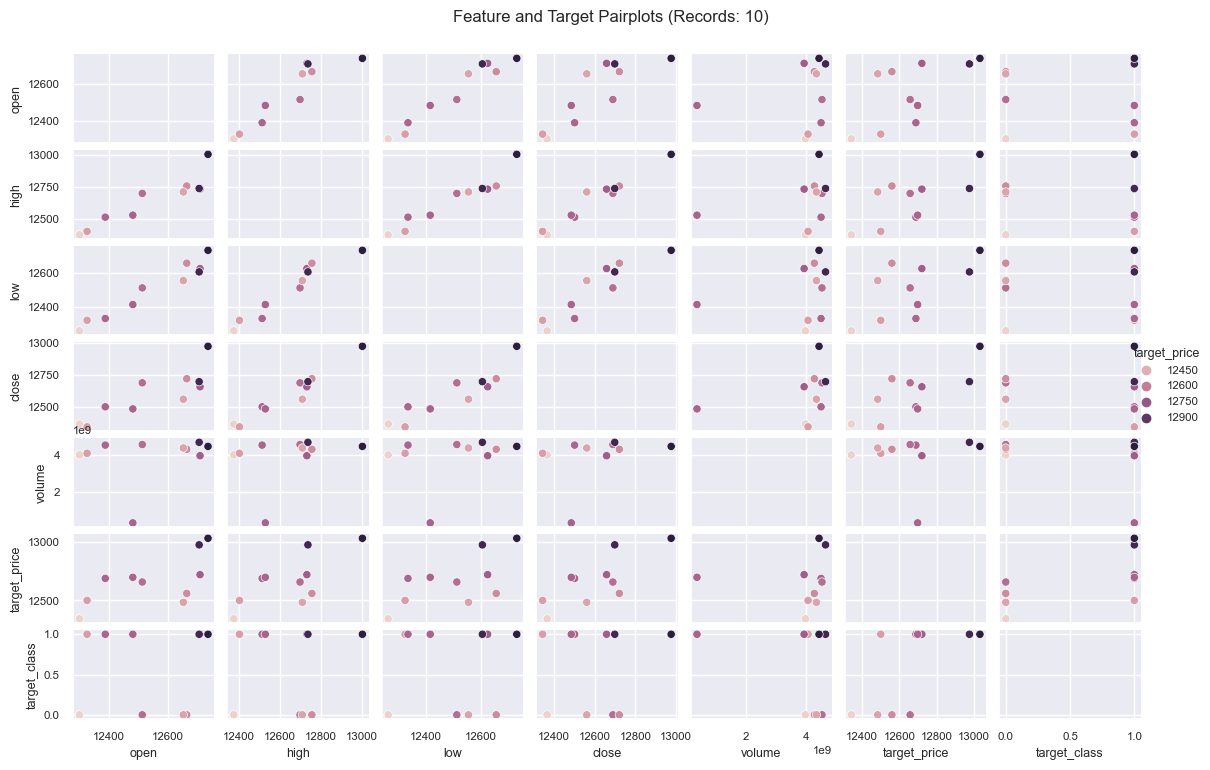

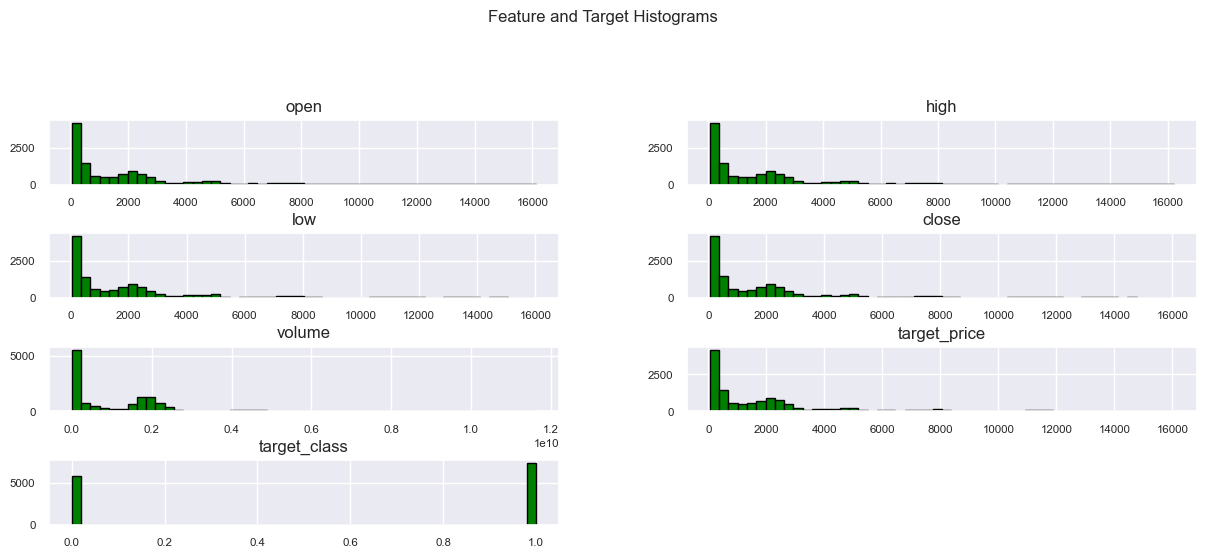

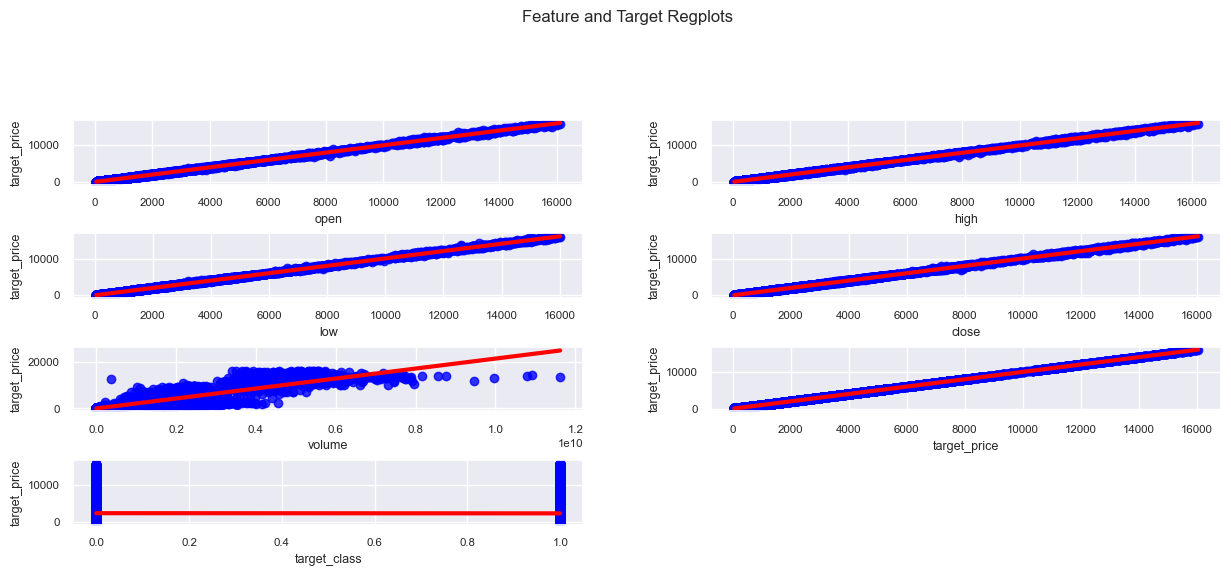

In [59]:
AssetData(str_co_ticker_1).get_visual_data()


 
MODEL ASSET: ^IXIC PERIOD: max INTERVAL: 1d
FILE EXISTS: \Users\mfreese\Downloads\Side_work notes\Investment\^IXIC-price-data-max-1d.csv UPDATE: NO
 

Classification Report:
 
              precision    recall  f1-score   support

           0       0.45      0.73      0.56      1783
           1       0.55      0.27      0.36      2175

    accuracy                           0.48      3958
   macro avg       0.50      0.50      0.46      3958
weighted avg       0.51      0.48      0.45      3958

 

Crosstab Confusion Matrix:
 
Predicted Classification  0     1  
Actual Classification              
0                         1307  476
1                         1590  585
 



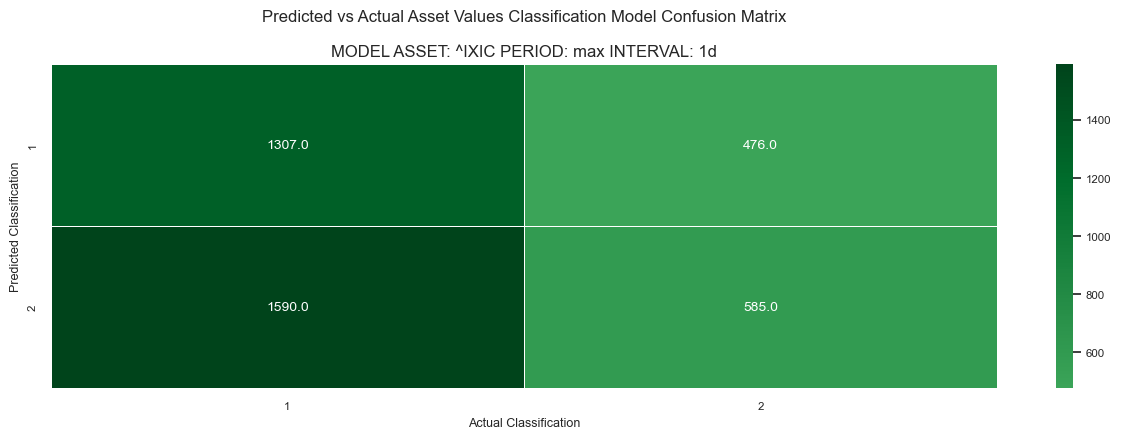


 

Feature, Target and Prediction Comparison: 
 
            open      high      low       close     volume      target_class  target_pred
date                                                                                     
2023-05-15  12301.17  12376.40  12263.35  12365.21  3979290000  0             0          
2023-05-16  12327.05  12403.81  12324.52  12343.05  4067510000  1             0          
2023-05-17  12388.58  12514.07  12335.02  12500.57  4501820000  1             0          
2023-05-18  12513.87  12698.50  12512.26  12688.84  4532890000  0             0          
2023-05-19  12709.46  12731.73  12624.06  12657.90  3935780000  1             0          
2023-05-22  12664.44  12756.23  12655.26  12720.78  4278920000  0             0          
2023-05-23  12652.88  12709.74  12554.43  12560.25  4347440000  0             0          
2023-05-24  12481.89  12529.63  12415.85  12484.16   359790000  1             0          
2023-05-25  12706.44  12736.92  12604.89  12698.09

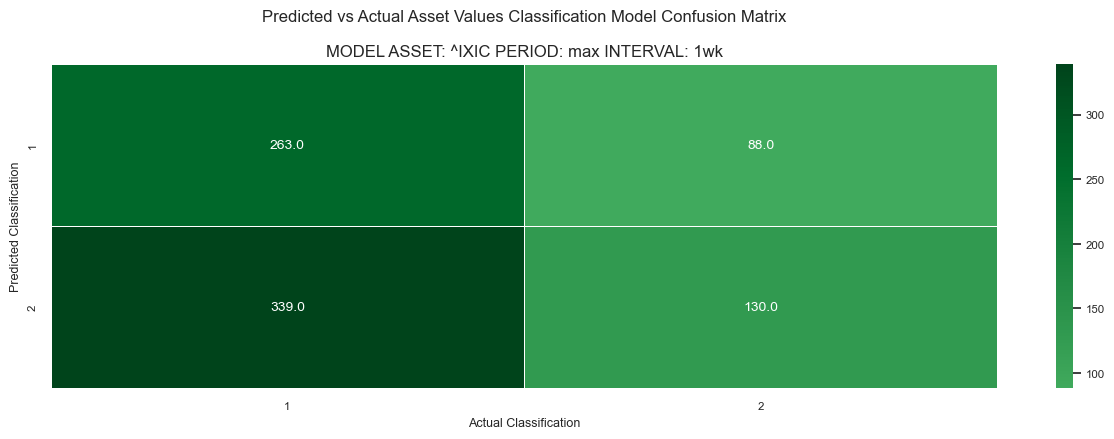


 

Feature, Target and Prediction Comparison: 
 
            open      high      low       close     volume       target_class  target_pred
date                                                                                      
2023-03-20  11614.39  12013.99  11550.69  11823.96  24063200000  1             0          
2023-03-27  11868.54  12227.93  11635.03  12221.91  23120800000  0             0          
2023-04-03  12146.09  12224.68  11898.36  12087.96  17356590000  1             0          
2023-04-10  11975.13  12205.72  11916.54  12123.47  23519530000  0             0          
2023-04-17  12108.23  12245.43  11986.82  12072.46  24106270000  1             0          
2023-04-24  12053.47  12227.72  11798.77  12226.58  25527130000  1             0          
2023-05-01  12210.05  12264.83  11925.37  12235.41  25772570000  1             0          
2023-05-08  12231.68  12364.65  12174.06  12284.74  21950890000  1             0          
2023-05-15  12301.17  12731.73  12263.35

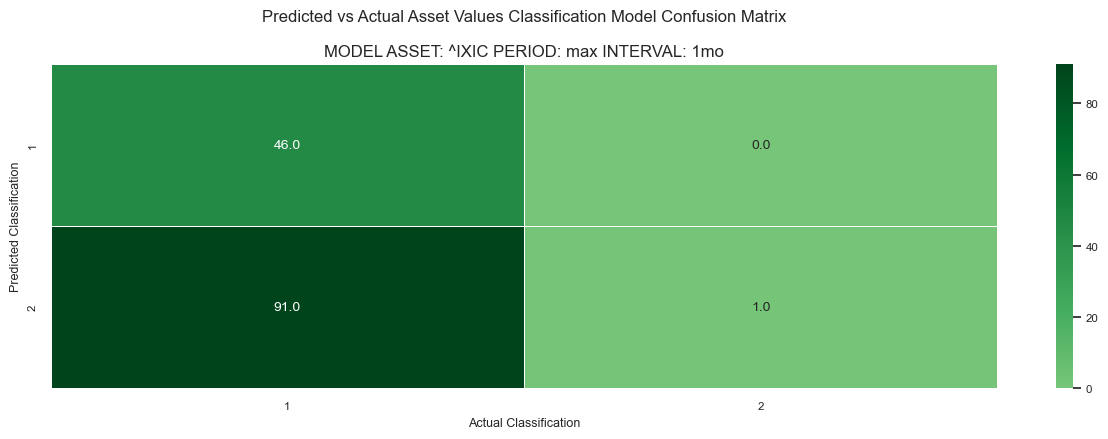


 

Feature, Target and Prediction Comparison: 
 
            open      high      low       close     volume        target_class  target_pred
date                                                                                       
2022-07-01  11006.83  12426.26  10911.45  12390.69   94293720000  0             0          
2022-08-01  12317.96  13181.09  11790.02  11816.20  110367680000  0             0          
2022-09-01  11707.44  12270.19  10572.33  10575.62   98888530000  1             0          
2022-10-01  10659.01  11230.44  10088.83  10988.15   98292380000  1             0          
2022-11-01  11154.74  11492.62  10262.93  11468.00  101572370000  0             0          
2022-12-01  11475.17  11571.64  10207.47  10466.48  100007430000  1             0          
2023-01-01  10562.06  11691.89  10265.04  11584.55  106732920000  0             0          
2023-02-01  11573.14  12269.55  11334.47  11455.54   99644100000  1             0          
2023-03-01  11447.58  12227.93

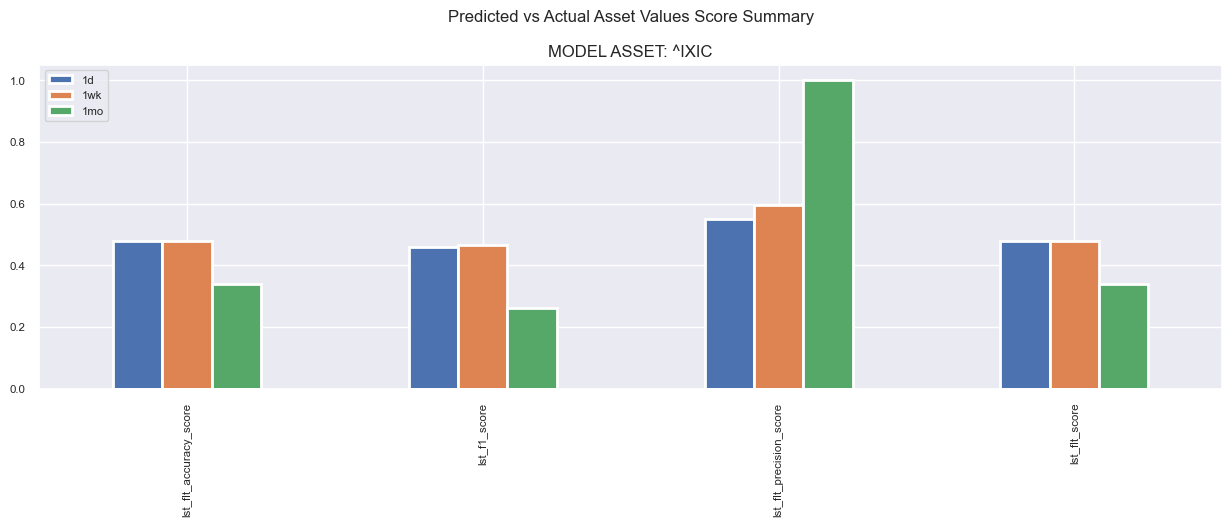

In [60]:
AssetData(str_co_ticker_1).run_class_model()


 
MODEL ASSET: ^IXIC PERIOD: max INTERVAL: 1d
FILE EXISTS: \Users\mfreese\Downloads\Side_work notes\Investment\^IXIC-price-data-max-1d.csv UPDATE: NO
 

Classification Report:
 
              precision    recall  f1-score   support

           0       0.45      0.73      0.56      1783
           1       0.54      0.26      0.36      2175

    accuracy                           0.47      3958
   macro avg       0.50      0.50      0.46      3958
weighted avg       0.50      0.47      0.45      3958

 

Crosstab Confusion Matrix:
 
Predicted Classification  0     1  
Actual Classification              
0                         1302  481
1                         1601  574
 



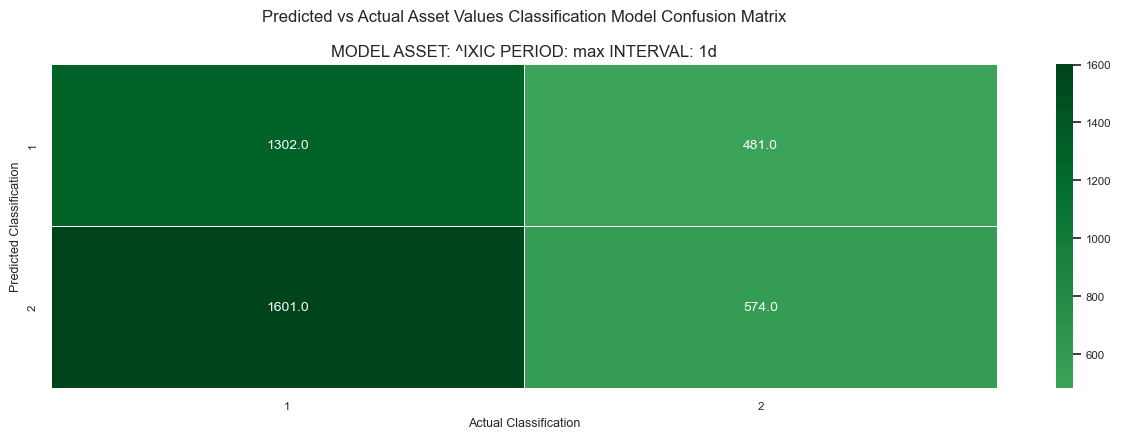


 

Feature, Target and Prediction Comparison: 
 
            open      high      low       close     volume      target_class  target_pred
date                                                                                     
2023-05-15  12301.17  12376.40  12263.35  12365.21  3979290000  0             0          
2023-05-16  12327.05  12403.81  12324.52  12343.05  4067510000  1             0          
2023-05-17  12388.58  12514.07  12335.02  12500.57  4501820000  1             0          
2023-05-18  12513.87  12698.50  12512.26  12688.84  4532890000  0             0          
2023-05-19  12709.46  12731.73  12624.06  12657.90  3935780000  1             0          
2023-05-22  12664.44  12756.23  12655.26  12720.78  4278920000  0             0          
2023-05-23  12652.88  12709.74  12554.43  12560.25  4347440000  0             0          
2023-05-24  12481.89  12529.63  12415.85  12484.16   359790000  1             0          
2023-05-25  12706.44  12736.92  12604.89  12698.09

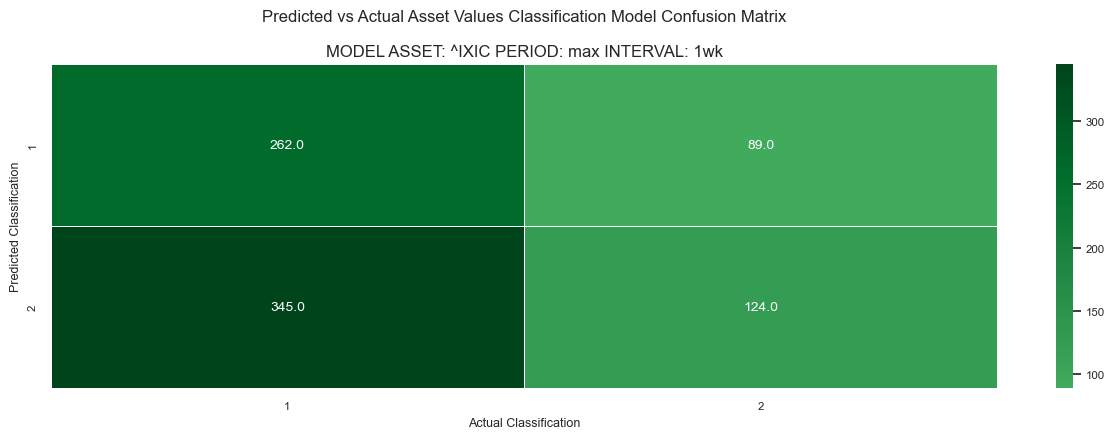


 

Feature, Target and Prediction Comparison: 
 
            open      high      low       close     volume       target_class  target_pred
date                                                                                      
2023-03-20  11614.39  12013.99  11550.69  11823.96  24063200000  1             0          
2023-03-27  11868.54  12227.93  11635.03  12221.91  23120800000  0             0          
2023-04-03  12146.09  12224.68  11898.36  12087.96  17356590000  1             0          
2023-04-10  11975.13  12205.72  11916.54  12123.47  23519530000  0             0          
2023-04-17  12108.23  12245.43  11986.82  12072.46  24106270000  1             0          
2023-04-24  12053.47  12227.72  11798.77  12226.58  25527130000  1             0          
2023-05-01  12210.05  12264.83  11925.37  12235.41  25772570000  1             0          
2023-05-08  12231.68  12364.65  12174.06  12284.74  21950890000  1             0          
2023-05-15  12301.17  12731.73  12263.35

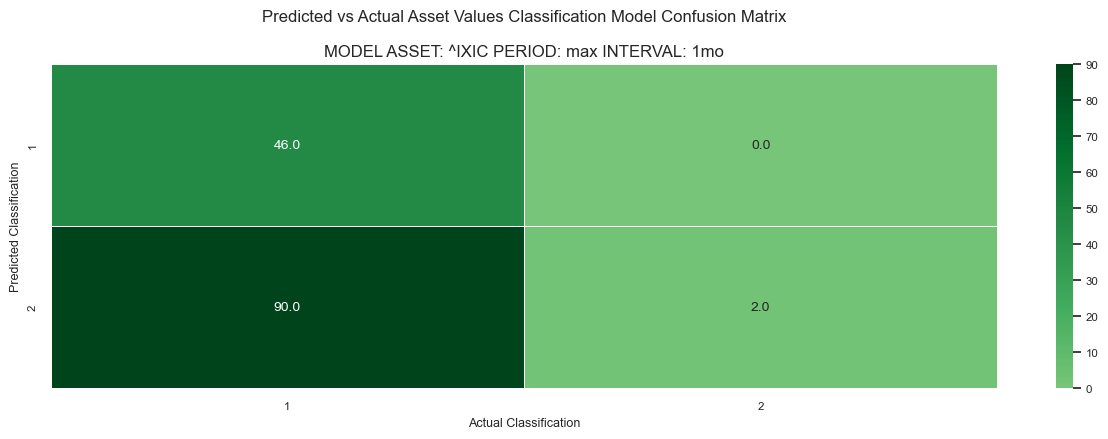


 

Feature, Target and Prediction Comparison: 
 
            open      high      low       close     volume        target_class  target_pred
date                                                                                       
2022-07-01  11006.83  12426.26  10911.45  12390.69   94293720000  0             0          
2022-08-01  12317.96  13181.09  11790.02  11816.20  110367680000  0             0          
2022-09-01  11707.44  12270.19  10572.33  10575.62   98888530000  1             0          
2022-10-01  10659.01  11230.44  10088.83  10988.15   98292380000  1             0          
2022-11-01  11154.74  11492.62  10262.93  11468.00  101572370000  0             0          
2022-12-01  11475.17  11571.64  10207.47  10466.48  100007430000  1             0          
2023-01-01  10562.06  11691.89  10265.04  11584.55  106732920000  0             0          
2023-02-01  11573.14  12269.55  11334.47  11455.54   99644100000  1             0          
2023-03-01  11447.58  12227.93

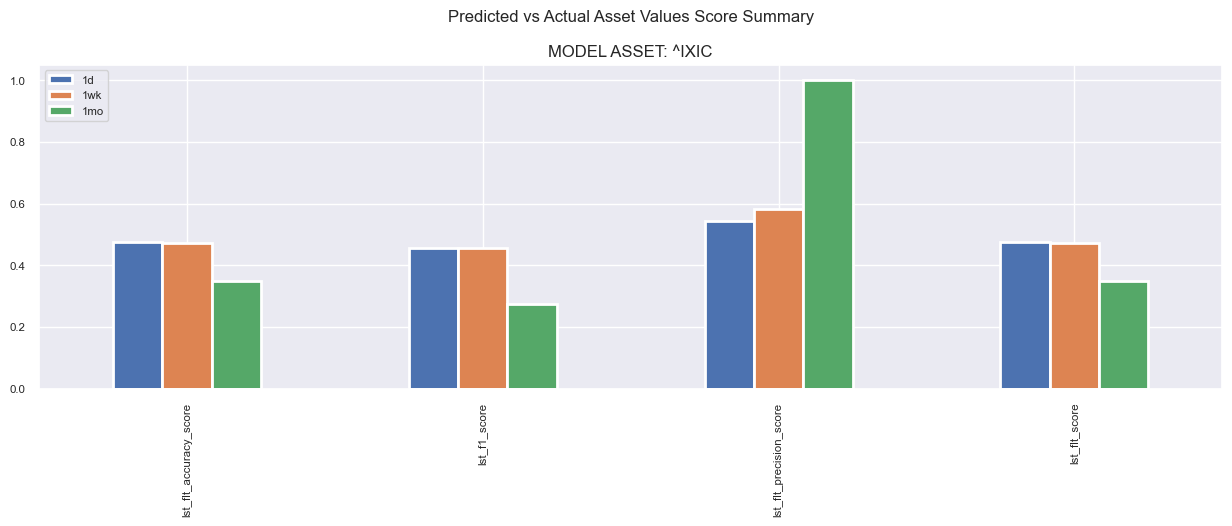


 

None

 
MODEL ASSET: NVDA PERIOD: max INTERVAL: 1d
FILE EXISTS: \Users\mfreese\Downloads\Side_work notes\Investment\NVDA-price-data-max-1d.csv UPDATE: NO
 

Classification Report:
 
              precision    recall  f1-score   support

           0       0.45      0.98      0.62       834
           1       0.57      0.03      0.05      1005

    accuracy                           0.46      1839
   macro avg       0.51      0.50      0.34      1839
weighted avg       0.52      0.46      0.31      1839

 

Crosstab Confusion Matrix:
 
Predicted Classification  0    1 
Actual Classification            
0                         814  20
1                         978  27
 



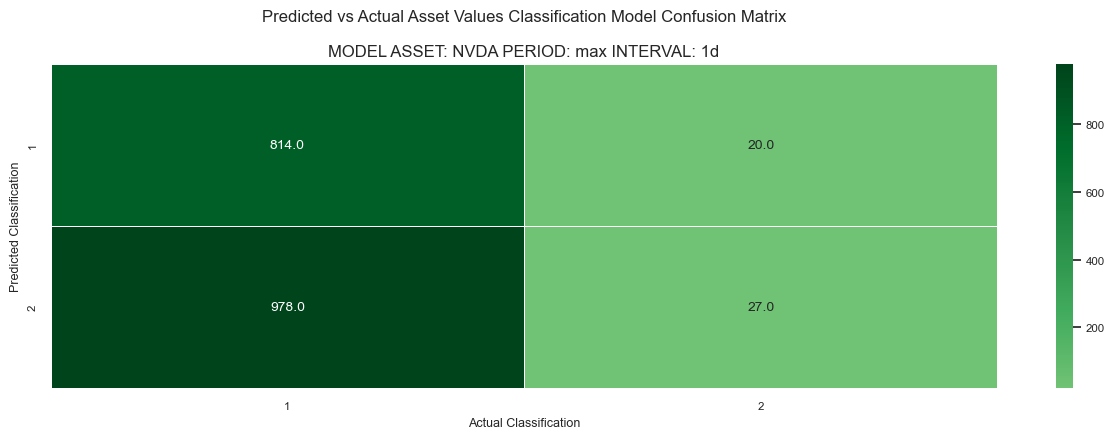


 

Feature, Target and Prediction Comparison: 
 
            open    high    low     close   volume     target_class  target_pred
date                                                                            
2023-05-15  285.08  289.69  281.52  289.53   29392600  1             0          
2023-05-16  288.41  298.70  288.32  292.13   44940500  1             0          
2023-05-17  295.84  301.99  294.30  301.78   43253500  1             0          
2023-05-18  304.10  318.28  303.20  316.78   74872500  0             0          
2023-05-19  315.36  315.80  309.16  312.64   47312400  0             0          
2023-05-22  309.01  315.20  306.80  311.76   37200000  0             0          
2023-05-23  310.00  312.88  306.31  306.88   35625300  0             0          
2023-05-24  302.10  306.07  298.06  305.38   72141900  1             0          
2023-05-25  385.23  394.80  366.35  379.80  154391100  1             0          
2023-05-26  378.90  391.70  375.50  389.46   71342900  1   

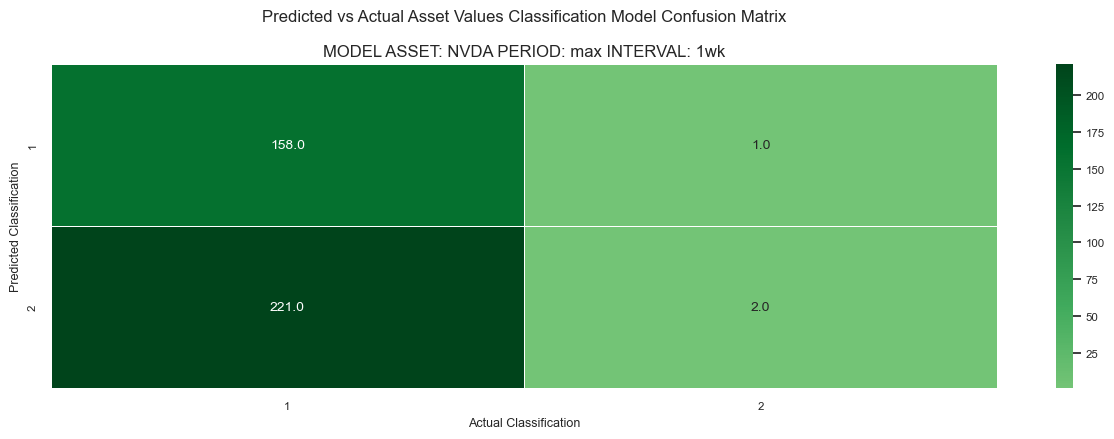


 

Feature, Target and Prediction Comparison: 
 
            open    high    low     close   volume     target_class  target_pred
date                                                                            
2023-03-20  256.15  275.89  251.30  267.79  279725900  1             0          
2023-03-27  268.37  278.34  258.50  277.77  190927300  0             0          
2023-04-03  275.09  280.00  263.95  270.37  167997700  0             0          
2023-04-10  268.23  277.90  262.20  267.58  190519100  1             0          
2023-04-17  265.65  281.10  264.33  271.19  205775900  1             0          
2023-04-24  270.13  277.58  262.25  277.49  179299400  1             0          
2023-05-01  278.40  290.58  272.40  286.80  203931000  0             0          
2023-05-08  285.22  292.20  280.46  283.40  162537400  1             0          
2023-05-15  285.08  318.28  281.52  312.64  239771500  1             0          
2023-05-22  309.01  394.80  298.06  389.46  370701200  1   

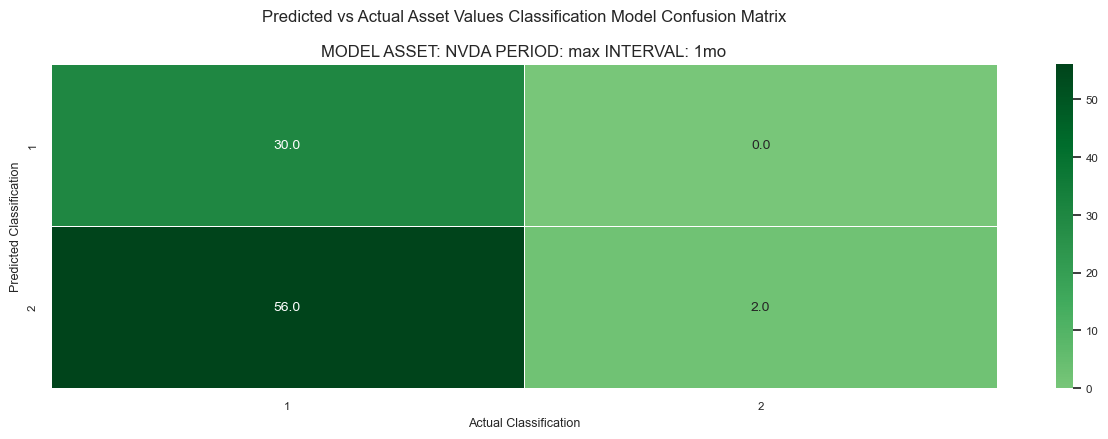


 

Feature, Target and Prediction Comparison: 
 
            open    high    low     close   volume      target_class  target_pred
date                                                                             
2022-07-01  148.99  182.44  140.55  181.63  1056447600  0             0          
2022-08-01  181.82  192.74  149.59  150.94  1206964800  0             0          
2022-09-01  142.09  145.47  119.46  121.39  1313057800  1             0          
2022-10-01  123.47  138.50  108.13  134.97  1254927700  1             0          
2022-11-01  138.11  169.98  129.56  169.23  1060060300  0             0          
2022-12-01  169.99  187.90  138.84  146.14   894615200  1             0          
2023-01-01  148.51  206.28  140.34  195.37   945496000  1             0          
2023-02-01  196.91  238.88  196.11  232.16  1039347900  1             0          
2023-03-01  231.92  278.34  222.97  277.77  1126373100  0             0          
2023-04-01  275.09  281.10  262.20  277.49   743

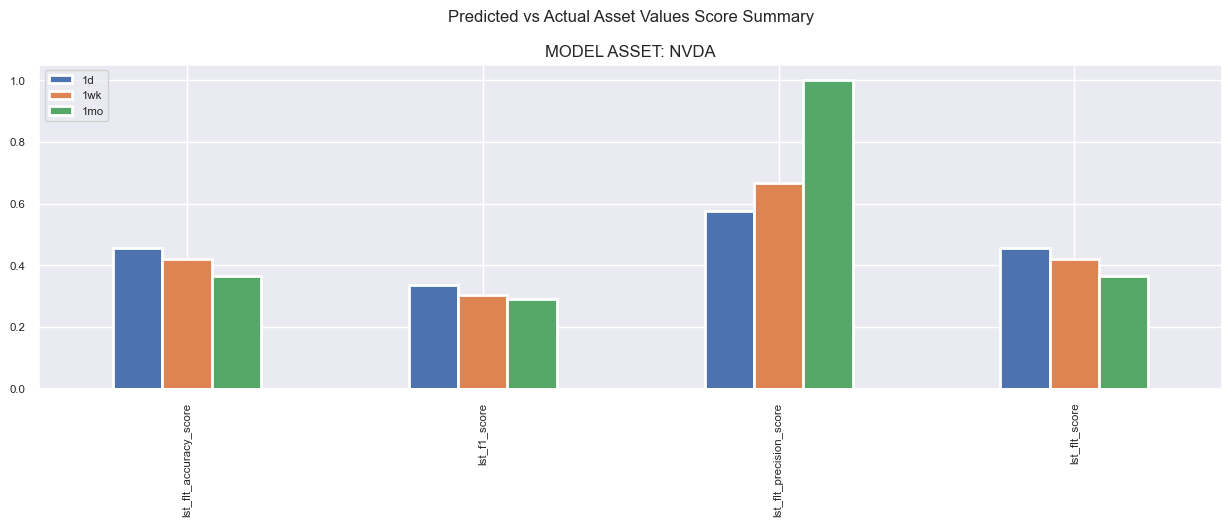


 

None

 
MODEL ASSET: ^IXIC PERIOD: max INTERVAL: 1d
FILE EXISTS: \Users\mfreese\Downloads\Side_work notes\Investment\^IXIC-price-data-max-1d.csv UPDATE: NO
 

Classification Report:
 
              precision    recall  f1-score   support

           0       0.45      0.72      0.55      1783
           1       0.54      0.26      0.35      2175

    accuracy                           0.47      3958
   macro avg       0.49      0.49      0.45      3958
weighted avg       0.50      0.47      0.44      3958

 

Crosstab Confusion Matrix:
 
Predicted Classification  0     1  
Actual Classification              
0                         1285  498
1                         1599  576
 



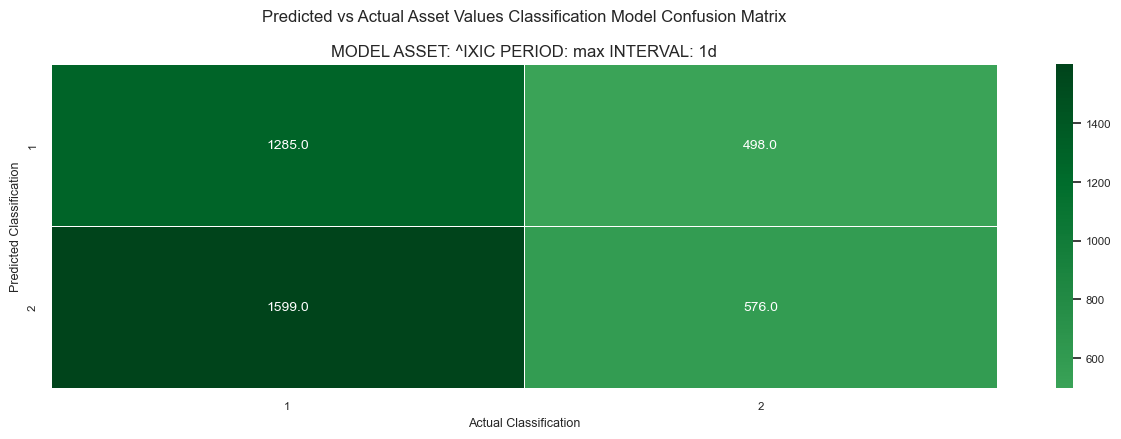


 

Feature, Target and Prediction Comparison: 
 
            open      high      low       close     volume      target_class  target_pred
date                                                                                     
2023-05-15  12301.17  12376.40  12263.35  12365.21  3979290000  0             0          
2023-05-16  12327.05  12403.81  12324.52  12343.05  4067510000  1             0          
2023-05-17  12388.58  12514.07  12335.02  12500.57  4501820000  1             0          
2023-05-18  12513.87  12698.50  12512.26  12688.84  4532890000  0             0          
2023-05-19  12709.46  12731.73  12624.06  12657.90  3935780000  1             0          
2023-05-22  12664.44  12756.23  12655.26  12720.78  4278920000  0             0          
2023-05-23  12652.88  12709.74  12554.43  12560.25  4347440000  0             0          
2023-05-24  12481.89  12529.63  12415.85  12484.16   359790000  1             0          
2023-05-25  12706.44  12736.92  12604.89  12698.09

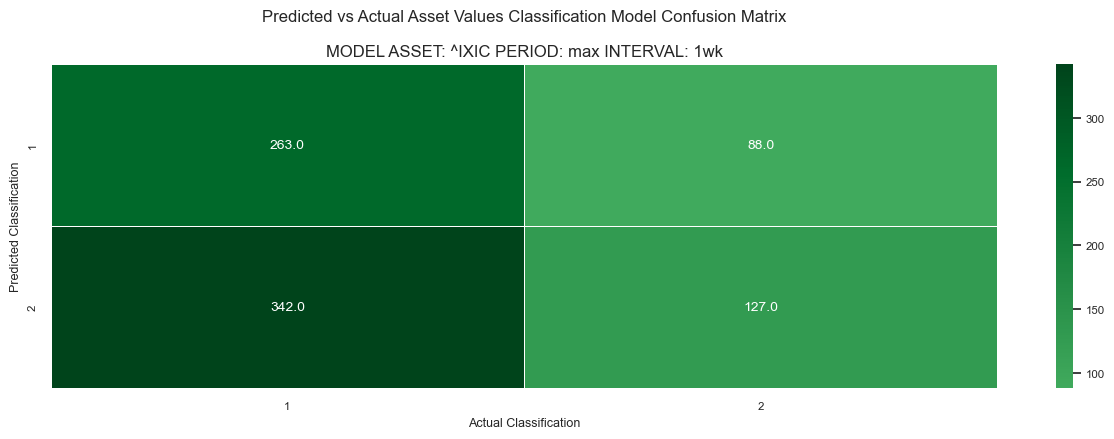


 

Feature, Target and Prediction Comparison: 
 
            open      high      low       close     volume       target_class  target_pred
date                                                                                      
2023-03-20  11614.39  12013.99  11550.69  11823.96  24063200000  1             0          
2023-03-27  11868.54  12227.93  11635.03  12221.91  23120800000  0             0          
2023-04-03  12146.09  12224.68  11898.36  12087.96  17356590000  1             0          
2023-04-10  11975.13  12205.72  11916.54  12123.47  23519530000  0             0          
2023-04-17  12108.23  12245.43  11986.82  12072.46  24106270000  1             0          
2023-04-24  12053.47  12227.72  11798.77  12226.58  25527130000  1             0          
2023-05-01  12210.05  12264.83  11925.37  12235.41  25772570000  1             0          
2023-05-08  12231.68  12364.65  12174.06  12284.74  21950890000  1             0          
2023-05-15  12301.17  12731.73  12263.35

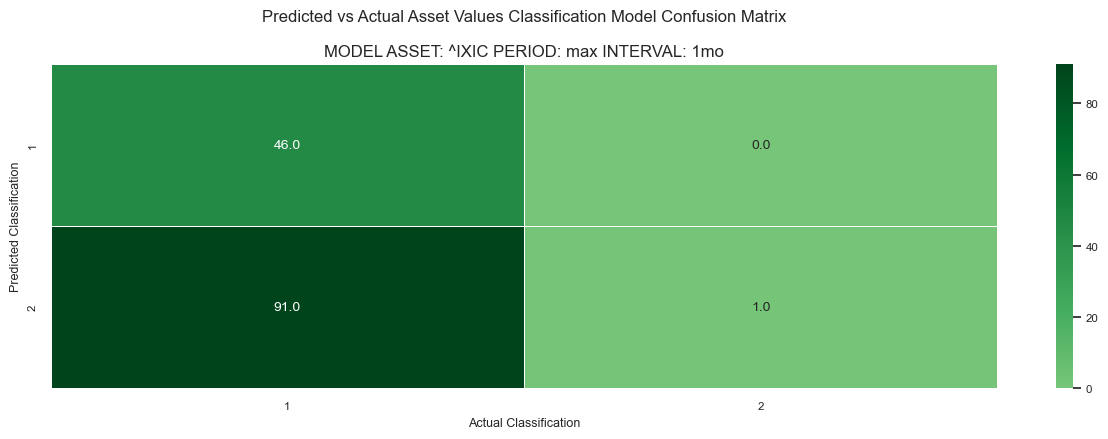


 

Feature, Target and Prediction Comparison: 
 
            open      high      low       close     volume        target_class  target_pred
date                                                                                       
2022-07-01  11006.83  12426.26  10911.45  12390.69   94293720000  0             0          
2022-08-01  12317.96  13181.09  11790.02  11816.20  110367680000  0             0          
2022-09-01  11707.44  12270.19  10572.33  10575.62   98888530000  1             0          
2022-10-01  10659.01  11230.44  10088.83  10988.15   98292380000  1             0          
2022-11-01  11154.74  11492.62  10262.93  11468.00  101572370000  0             0          
2022-12-01  11475.17  11571.64  10207.47  10466.48  100007430000  1             0          
2023-01-01  10562.06  11691.89  10265.04  11584.55  106732920000  0             0          
2023-02-01  11573.14  12269.55  11334.47  11455.54   99644100000  1             0          
2023-03-01  11447.58  12227.93

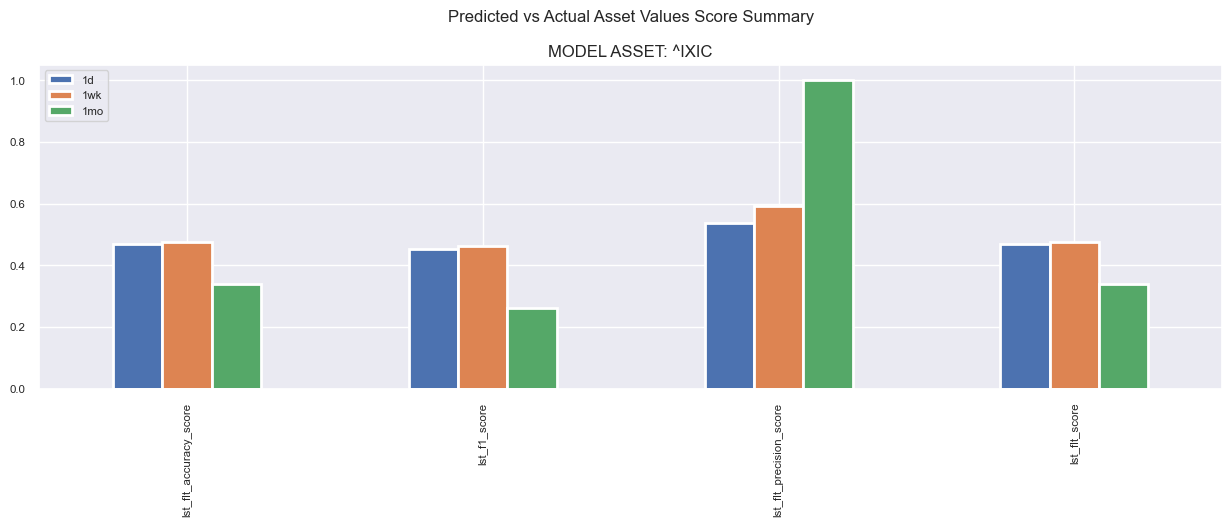


 

None


In [61]:
AssetData(str_co_ticker_1).run_class_model_list([str_co_ticker_1, str_co_ticker_2])


 
MODEL ASSET: ^IXIC PERIOD: max INTERVAL: 1d
FILE EXISTS: \Users\mfreese\Downloads\Side_work notes\Investment\^IXIC-price-data-max-1d.csv UPDATE: NO
 

Model Coefficents: 
 
[-1.12441911e-01  1.06170963e-01  5.45270081e-02  9.50973582e-01
  1.18722361e-10]
 

Model Intercept: 
 
0.5927581810818765
 



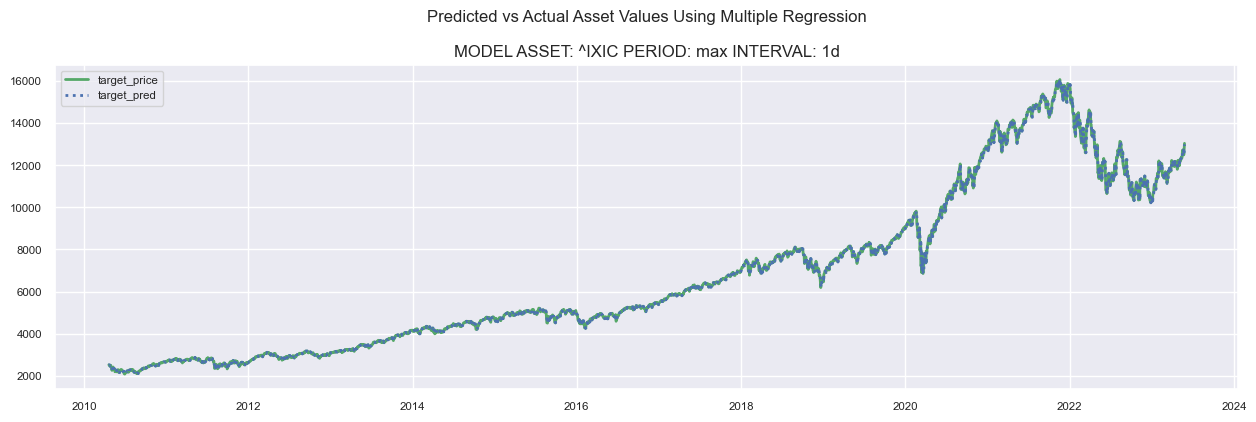


 

Feature, Target and Prediction Comparison: 
 
            open      high      low       close     volume      target_price  target_pred
date                                                                                     
2023-05-15  12301.17  12376.40  12263.35  12365.21  3979290000  12343.050     12359.584  
2023-05-16  12327.05  12403.81  12324.52  12343.05  4067510000  12500.570     12341.856  
2023-05-17  12388.58  12514.07  12335.02  12500.57  4501820000  12688.840     12497.066  
2023-05-18  12513.87  12698.50  12512.26  12688.84  4532890000  12657.900     12691.267  
2023-05-19  12709.46  12731.73  12624.06  12657.90  3935780000  12720.780     12649.405  
2023-05-22  12664.44  12756.23  12655.26  12720.78  4278920000  12560.250     12718.608  
2023-05-23  12652.88  12709.74  12554.43  12560.25  4347440000  12484.160     12556.822  
2023-05-24  12481.89  12529.63  12415.85  12484.16   359790000  12698.090     12476.536  
2023-05-25  12706.44  12736.92  12604.89  12698.09

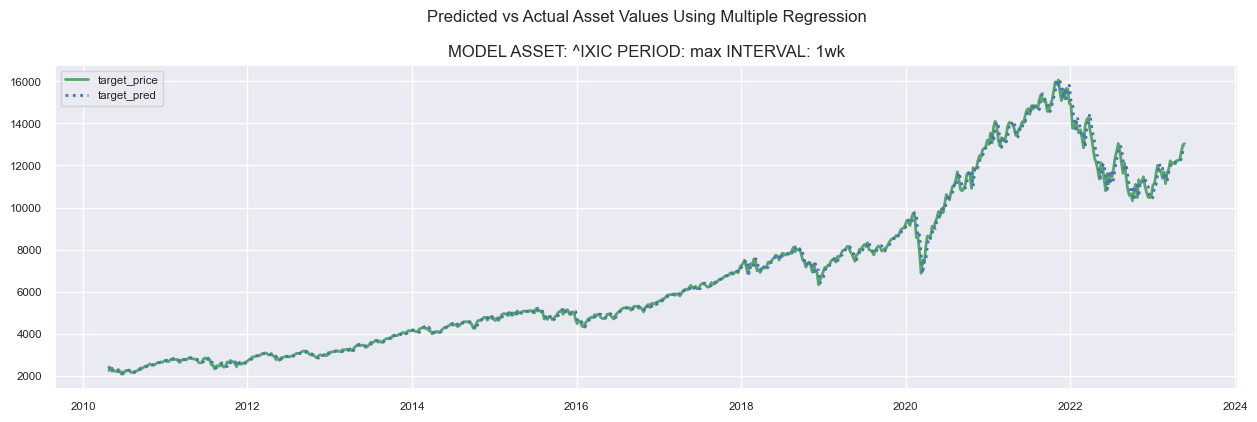


 

Feature, Target and Prediction Comparison: 
 
            open      high      low       close     volume       target_price  target_pred
date                                                                                      
2023-03-20  11614.39  12013.99  11550.69  11823.96  24063200000  12221.910     11911.315  
2023-03-27  11868.54  12227.93  11635.03  12221.91  23120800000  12087.960     12141.338  
2023-04-03  12146.09  12224.68  11898.36  12087.96  17356590000  12123.470     12089.582  
2023-04-10  11975.13  12205.72  11916.54  12123.47  23519530000  12072.460     12165.991  
2023-04-17  12108.23  12245.43  11986.82  12072.46  24106270000  12226.580     12139.180  
2023-04-24  12053.47  12227.72  11798.77  12226.58  25527130000  12235.410     12140.567  
2023-05-01  12210.05  12264.83  11925.37  12235.41  25772570000  12284.740     12156.794  
2023-05-08  12231.68  12364.65  12174.06  12284.74  21950890000  12657.900     12333.603  
2023-05-15  12301.17  12731.73  12263.35

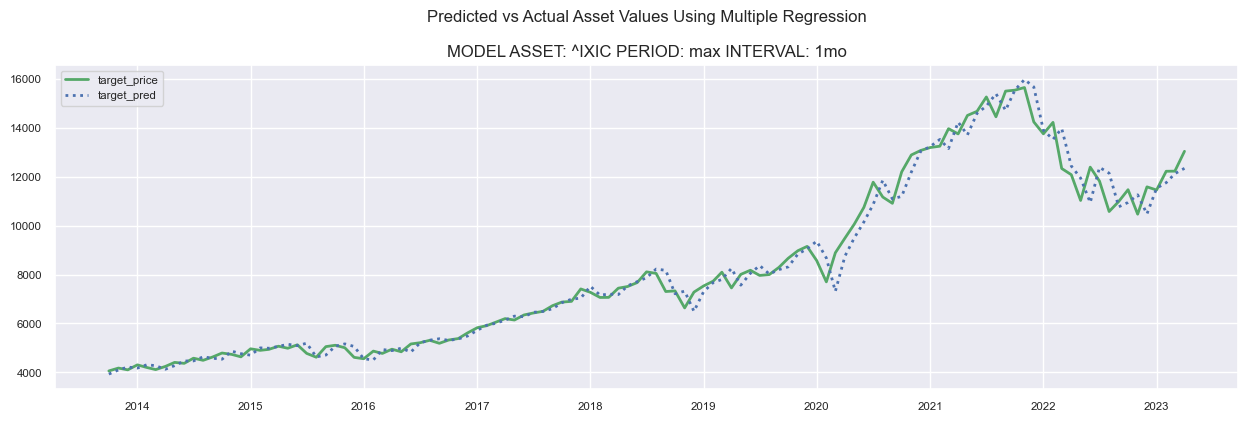


 

Feature, Target and Prediction Comparison: 
 
            open      high      low       close     volume        target_price  target_pred
date                                                                                       
2022-07-01  11006.83  12426.26  10911.45  12390.69   94293720000  11816.200     12381.614  
2022-08-01  12317.96  13181.09  11790.02  11816.20  110367680000  10575.620     12143.597  
2022-09-01  11707.44  12270.19  10572.33  10575.62   98888530000  10988.150     10768.671  
2022-10-01  10659.01  11230.44  10088.83  10988.15   98292380000  11468.000     10947.343  
2022-11-01  11154.74  11492.62  10262.93  11468.00  101572370000  10466.480     11258.413  
2022-12-01  11475.17  11571.64  10207.47  10466.48  100007430000  11584.550     10477.045  
2023-01-01  10562.06  11691.89  10265.04  11584.55  106732920000  11455.540     11527.609  
2023-02-01  11573.14  12269.55  11334.47  11455.54   99644100000  12221.910     11754.890  
2023-03-01  11447.58  12227.93

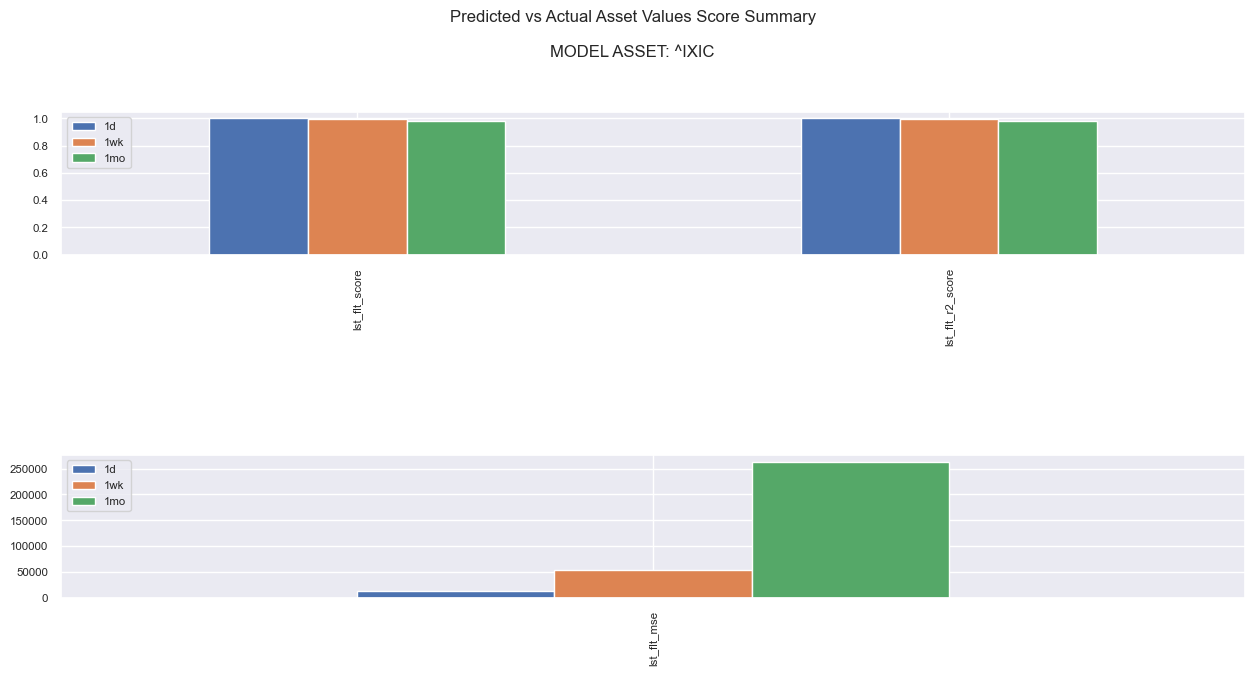

In [62]:
AssetData(str_co_ticker_1).run_mlr_model()


 
MODEL ASSET: ^IXIC PERIOD: max INTERVAL: 1d
FILE EXISTS: \Users\mfreese\Downloads\Side_work notes\Investment\^IXIC-price-data-max-1d.csv UPDATE: NO
 

Model Coefficents: 
 
[-1.12441911e-01  1.06170963e-01  5.45270081e-02  9.50973582e-01
  1.18722361e-10]
 

Model Intercept: 
 
0.5927581810818765
 



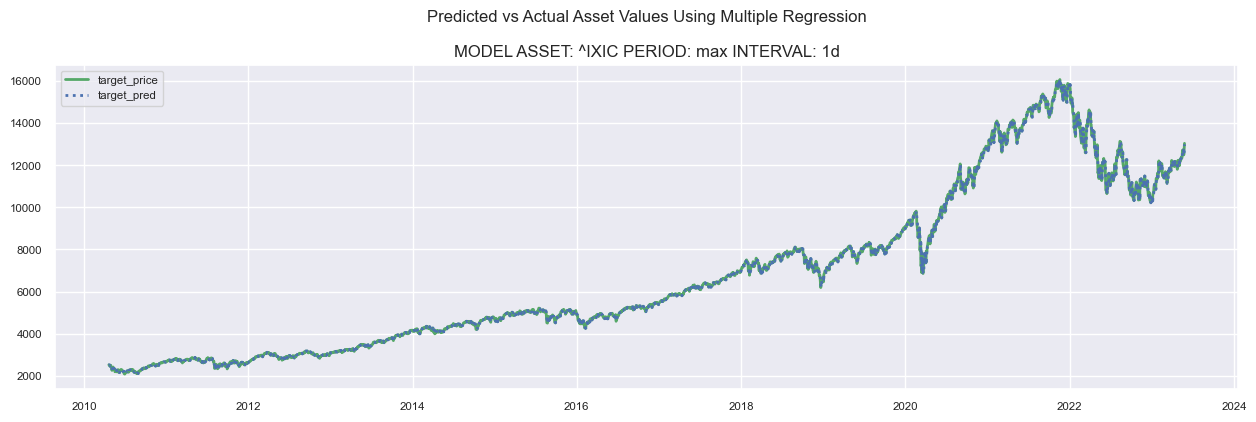


 

Feature, Target and Prediction Comparison: 
 
            open      high      low       close     volume      target_price  target_pred
date                                                                                     
2023-05-15  12301.17  12376.40  12263.35  12365.21  3979290000  12343.050     12359.584  
2023-05-16  12327.05  12403.81  12324.52  12343.05  4067510000  12500.570     12341.856  
2023-05-17  12388.58  12514.07  12335.02  12500.57  4501820000  12688.840     12497.066  
2023-05-18  12513.87  12698.50  12512.26  12688.84  4532890000  12657.900     12691.267  
2023-05-19  12709.46  12731.73  12624.06  12657.90  3935780000  12720.780     12649.405  
2023-05-22  12664.44  12756.23  12655.26  12720.78  4278920000  12560.250     12718.608  
2023-05-23  12652.88  12709.74  12554.43  12560.25  4347440000  12484.160     12556.822  
2023-05-24  12481.89  12529.63  12415.85  12484.16   359790000  12698.090     12476.536  
2023-05-25  12706.44  12736.92  12604.89  12698.09

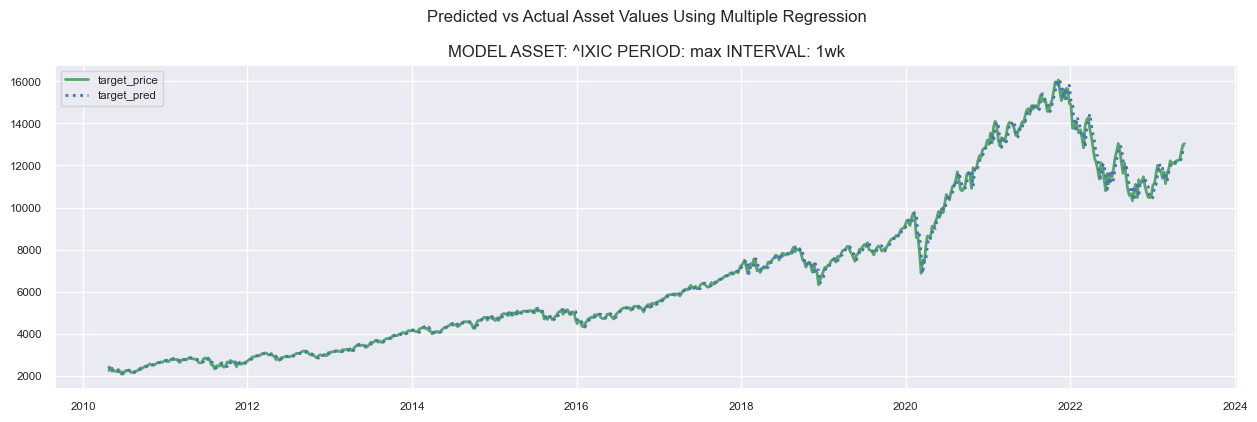


 

Feature, Target and Prediction Comparison: 
 
            open      high      low       close     volume       target_price  target_pred
date                                                                                      
2023-03-20  11614.39  12013.99  11550.69  11823.96  24063200000  12221.910     11911.315  
2023-03-27  11868.54  12227.93  11635.03  12221.91  23120800000  12087.960     12141.338  
2023-04-03  12146.09  12224.68  11898.36  12087.96  17356590000  12123.470     12089.582  
2023-04-10  11975.13  12205.72  11916.54  12123.47  23519530000  12072.460     12165.991  
2023-04-17  12108.23  12245.43  11986.82  12072.46  24106270000  12226.580     12139.180  
2023-04-24  12053.47  12227.72  11798.77  12226.58  25527130000  12235.410     12140.567  
2023-05-01  12210.05  12264.83  11925.37  12235.41  25772570000  12284.740     12156.794  
2023-05-08  12231.68  12364.65  12174.06  12284.74  21950890000  12657.900     12333.603  
2023-05-15  12301.17  12731.73  12263.35

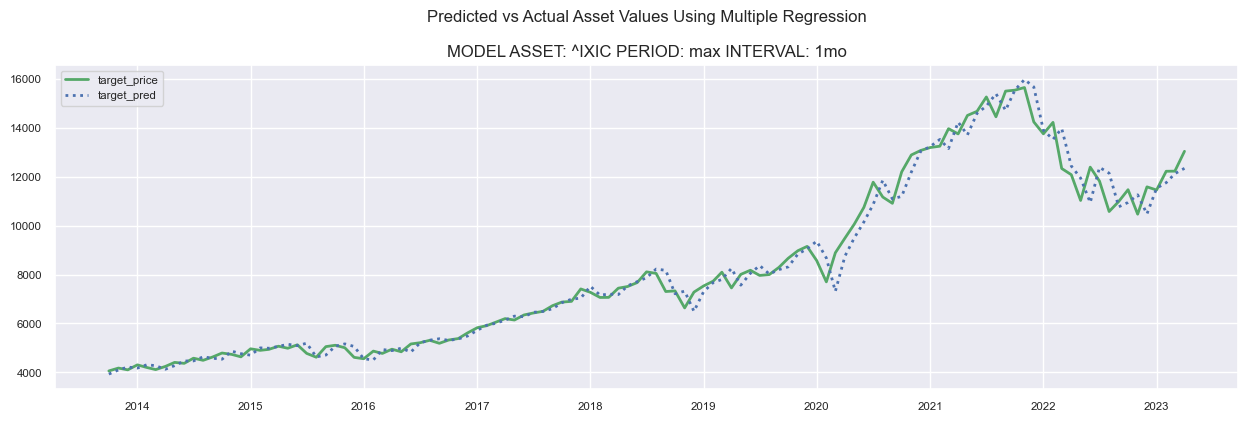


 

Feature, Target and Prediction Comparison: 
 
            open      high      low       close     volume        target_price  target_pred
date                                                                                       
2022-07-01  11006.83  12426.26  10911.45  12390.69   94293720000  11816.200     12381.614  
2022-08-01  12317.96  13181.09  11790.02  11816.20  110367680000  10575.620     12143.597  
2022-09-01  11707.44  12270.19  10572.33  10575.62   98888530000  10988.150     10768.671  
2022-10-01  10659.01  11230.44  10088.83  10988.15   98292380000  11468.000     10947.343  
2022-11-01  11154.74  11492.62  10262.93  11468.00  101572370000  10466.480     11258.413  
2022-12-01  11475.17  11571.64  10207.47  10466.48  100007430000  11584.550     10477.045  
2023-01-01  10562.06  11691.89  10265.04  11584.55  106732920000  11455.540     11527.609  
2023-02-01  11573.14  12269.55  11334.47  11455.54   99644100000  12221.910     11754.890  
2023-03-01  11447.58  12227.93

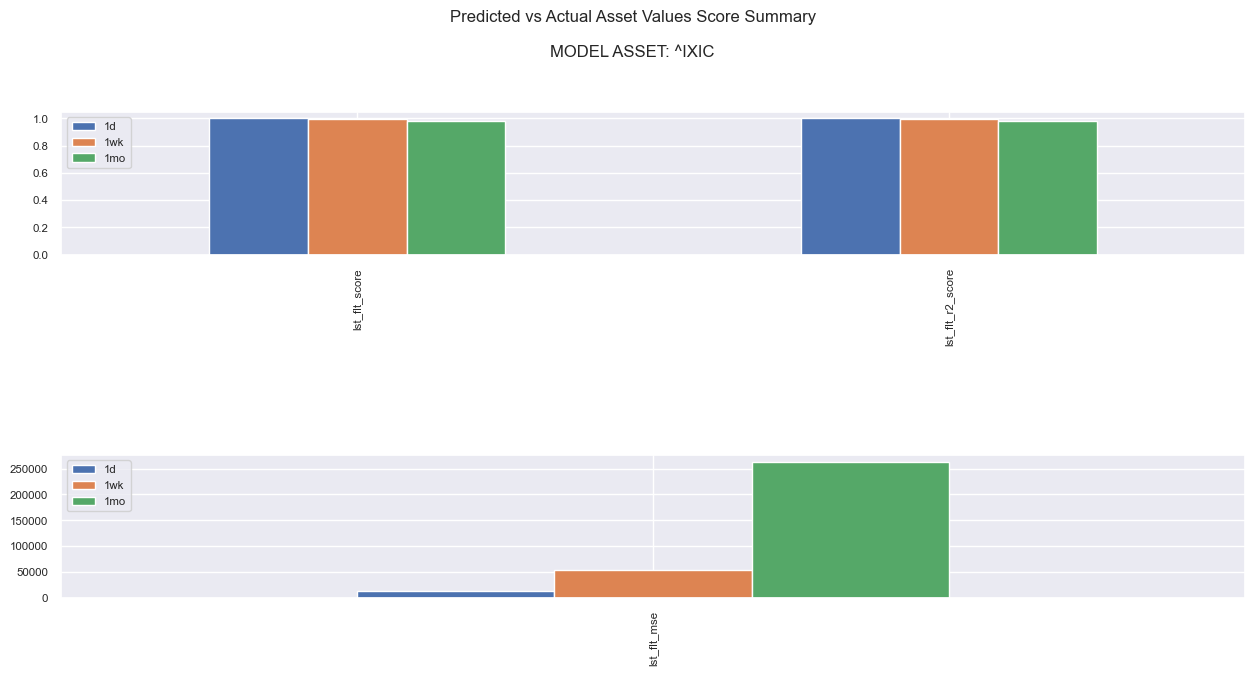


 

None

 
MODEL ASSET: NVDA PERIOD: max INTERVAL: 1d
FILE EXISTS: \Users\mfreese\Downloads\Side_work notes\Investment\NVDA-price-data-max-1d.csv UPDATE: NO
 

Model Coefficents: 
 
[-7.17150468e-02  1.30655892e-01  1.48618553e-01  7.94974764e-01
 -5.48361112e-11]
 

Model Intercept: 
 
0.00019500036927766473
 



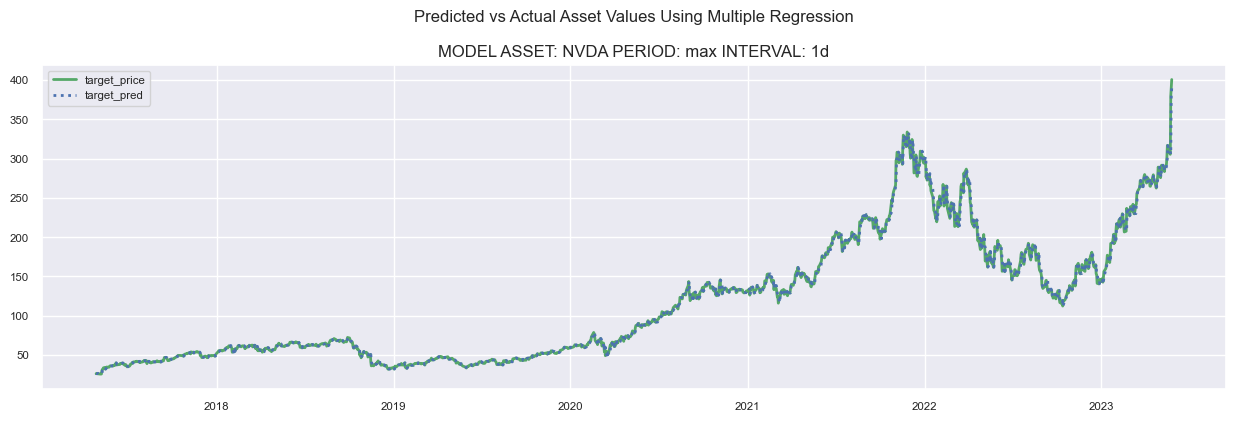


 

Feature, Target and Prediction Comparison: 
 
            open    high    low     close   volume     target_price  target_pred
date                                                                            
2023-05-15  285.08  289.69  281.52  289.53   29392600  292.130       289.412    
2023-05-16  288.41  298.70  288.32  292.13   44940500  301.780       293.427    
2023-05-17  295.84  301.99  294.30  301.78   43253500  316.780       301.884    
2023-05-18  304.10  318.28  303.20  316.78   74872500  312.640       316.666    
2023-05-19  315.36  315.80  309.16  312.64   47312400  311.760       313.131    
2023-05-22  309.01  315.20  306.80  311.76   37200000  306.880       312.458    
2023-05-23  310.00  312.88  306.31  306.88   35625300  305.380       308.131    
2023-05-24  302.10  306.07  298.06  305.38   72141900  379.800       305.388    
2023-05-25  385.23  394.80  366.35  379.80  154391100  389.460       380.326    
2023-05-26  378.90  391.70  375.50  389.46   71342900  400.

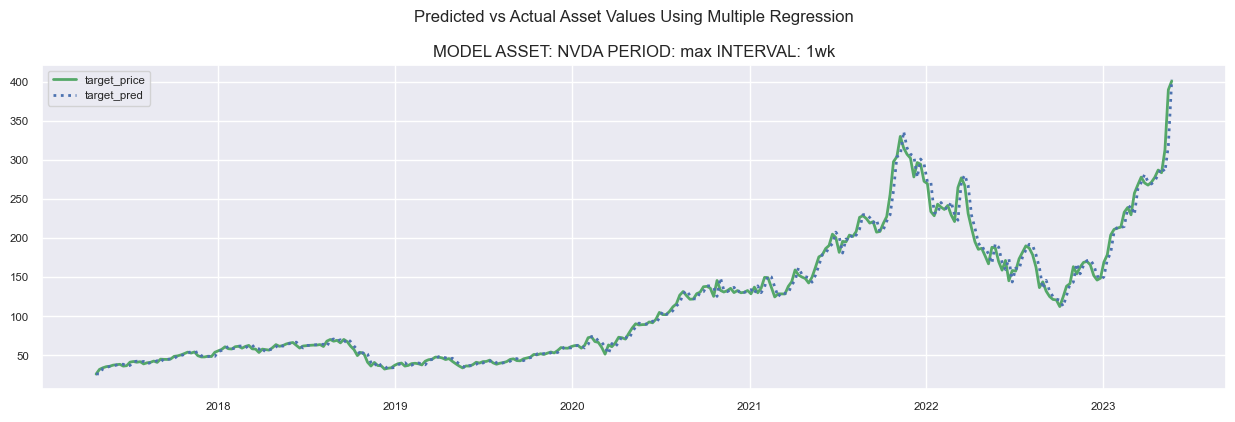


 

Feature, Target and Prediction Comparison: 
 
            open    high    low     close   volume     target_price  target_pred
date                                                                            
2023-03-20  256.15  275.89  251.30  267.79  279725900  277.770       270.762    
2023-03-27  268.37  278.34  258.50  277.77  190927300  270.370       281.346    
2023-04-03  275.09  280.00  263.95  270.37  167997700  267.580       271.766    
2023-04-10  268.23  277.90  262.20  267.58  190519100  271.190       268.986    
2023-04-17  265.65  281.10  264.33  271.19  205775900  277.490       273.003    
2023-04-24  270.13  277.58  262.25  277.49  179299400  286.800       280.650    
2023-05-01  278.40  290.58  272.40  286.80  203931000  283.400       289.789    
2023-05-08  285.22  292.20  280.46  283.40  162537400  312.640       284.708    
2023-05-15  285.08  318.28  281.52  312.64  239771500  389.460       317.901    
2023-05-22  309.01  394.80  298.06  389.46  370701200  400.

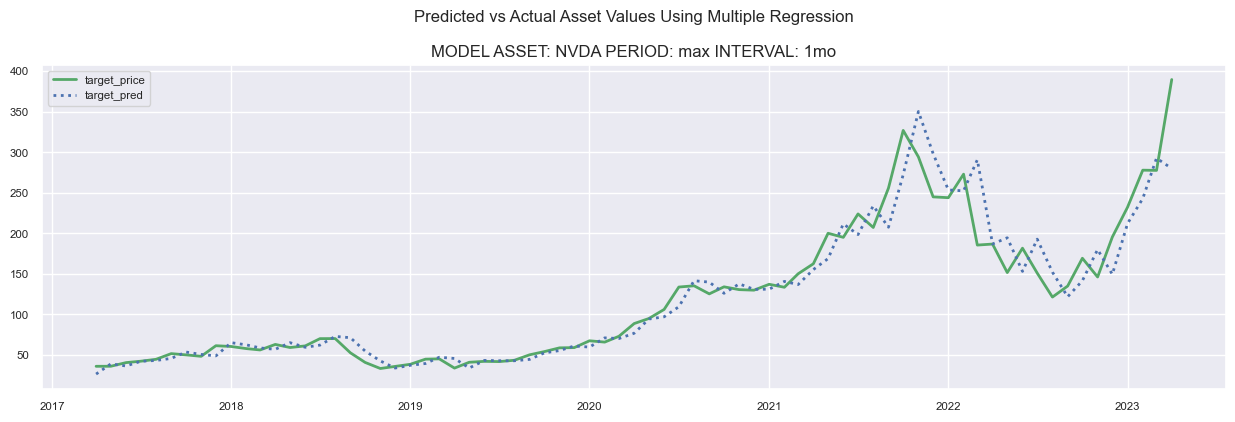


 

Feature, Target and Prediction Comparison: 
 
            open    high    low     close   volume      target_price  target_pred
date                                                                             
2022-07-01  148.99  182.44  140.55  181.63  1056447600  150.94        192.782    
2022-08-01  181.82  192.74  149.59  150.94  1206964800  121.39        152.117    
2022-09-01  142.09  145.47  119.46  121.39  1313057800  134.97        121.807    
2022-10-01  123.47  138.50  108.13  134.97  1254927700  169.23        141.538    
2022-11-01  138.11  169.98  129.56  169.23  1060060300  146.14        179.998    
2022-12-01  169.99  187.90  138.84  146.14   894615200  195.37        149.395    
2023-01-01  148.51  206.28  140.34  195.37   945496000  232.16        212.042    
2023-02-01  196.91  238.88  196.11  232.16  1039347900  277.77        242.789    
2023-03-01  231.92  278.34  222.97  277.77  1126373100  277.49        292.548    
2023-04-01  275.09  281.10  262.20  277.49   743

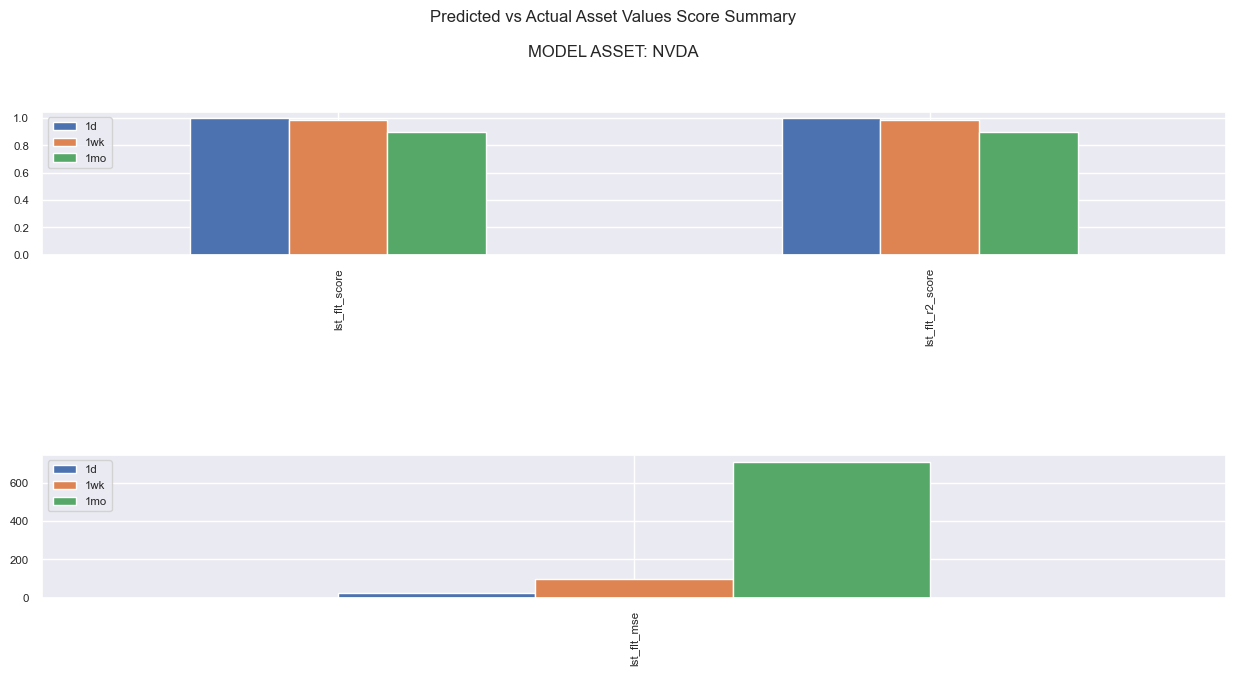


 

None

 
MODEL ASSET: ^IXIC PERIOD: max INTERVAL: 1d
FILE EXISTS: \Users\mfreese\Downloads\Side_work notes\Investment\^IXIC-price-data-max-1d.csv UPDATE: NO
 

Model Coefficents: 
 
[-1.12441911e-01  1.06170963e-01  5.45270081e-02  9.50973582e-01
  1.18722361e-10]
 

Model Intercept: 
 
0.5927581810818765
 



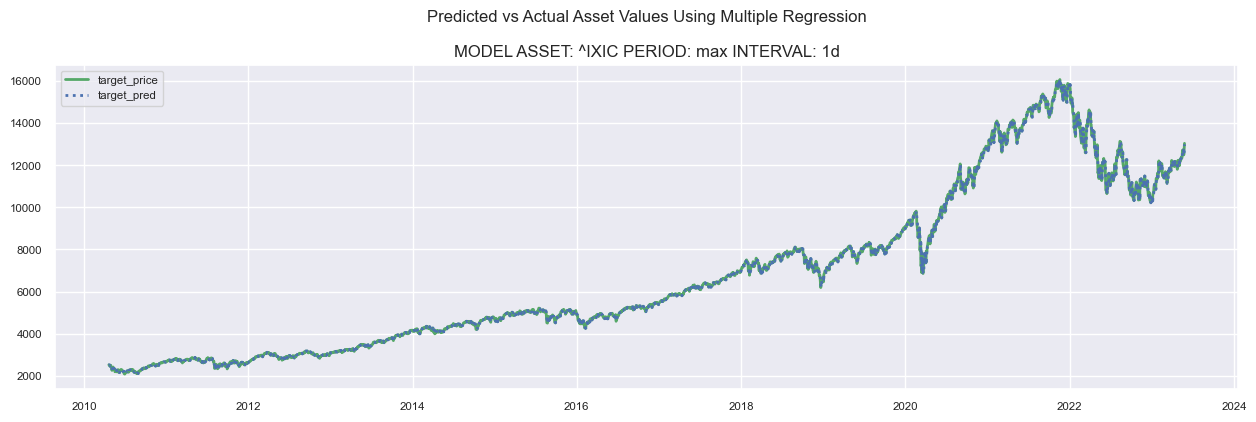


 

Feature, Target and Prediction Comparison: 
 
            open      high      low       close     volume      target_price  target_pred
date                                                                                     
2023-05-15  12301.17  12376.40  12263.35  12365.21  3979290000  12343.050     12359.584  
2023-05-16  12327.05  12403.81  12324.52  12343.05  4067510000  12500.570     12341.856  
2023-05-17  12388.58  12514.07  12335.02  12500.57  4501820000  12688.840     12497.066  
2023-05-18  12513.87  12698.50  12512.26  12688.84  4532890000  12657.900     12691.267  
2023-05-19  12709.46  12731.73  12624.06  12657.90  3935780000  12720.780     12649.405  
2023-05-22  12664.44  12756.23  12655.26  12720.78  4278920000  12560.250     12718.608  
2023-05-23  12652.88  12709.74  12554.43  12560.25  4347440000  12484.160     12556.822  
2023-05-24  12481.89  12529.63  12415.85  12484.16   359790000  12698.090     12476.536  
2023-05-25  12706.44  12736.92  12604.89  12698.09

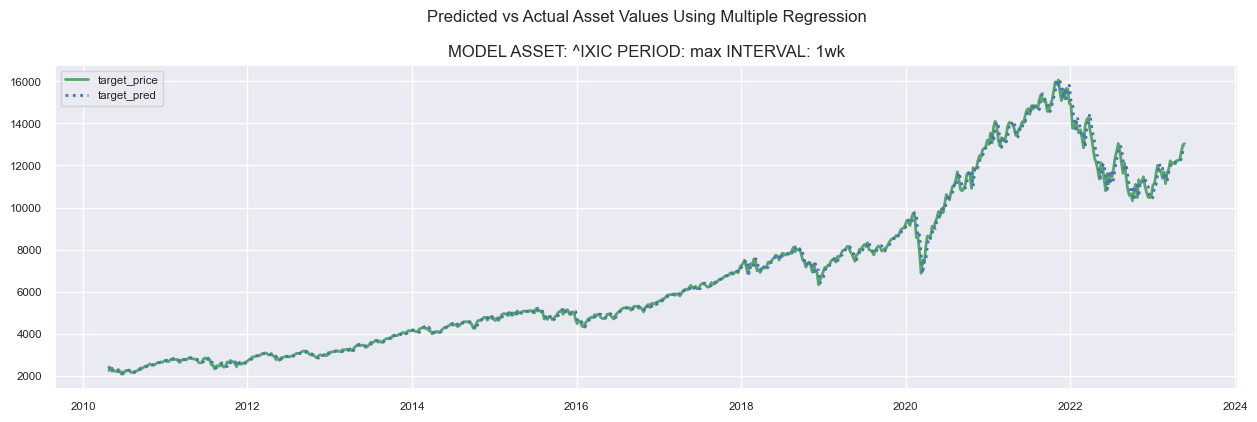


 

Feature, Target and Prediction Comparison: 
 
            open      high      low       close     volume       target_price  target_pred
date                                                                                      
2023-03-20  11614.39  12013.99  11550.69  11823.96  24063200000  12221.910     11911.315  
2023-03-27  11868.54  12227.93  11635.03  12221.91  23120800000  12087.960     12141.338  
2023-04-03  12146.09  12224.68  11898.36  12087.96  17356590000  12123.470     12089.582  
2023-04-10  11975.13  12205.72  11916.54  12123.47  23519530000  12072.460     12165.991  
2023-04-17  12108.23  12245.43  11986.82  12072.46  24106270000  12226.580     12139.180  
2023-04-24  12053.47  12227.72  11798.77  12226.58  25527130000  12235.410     12140.567  
2023-05-01  12210.05  12264.83  11925.37  12235.41  25772570000  12284.740     12156.794  
2023-05-08  12231.68  12364.65  12174.06  12284.74  21950890000  12657.900     12333.603  
2023-05-15  12301.17  12731.73  12263.35

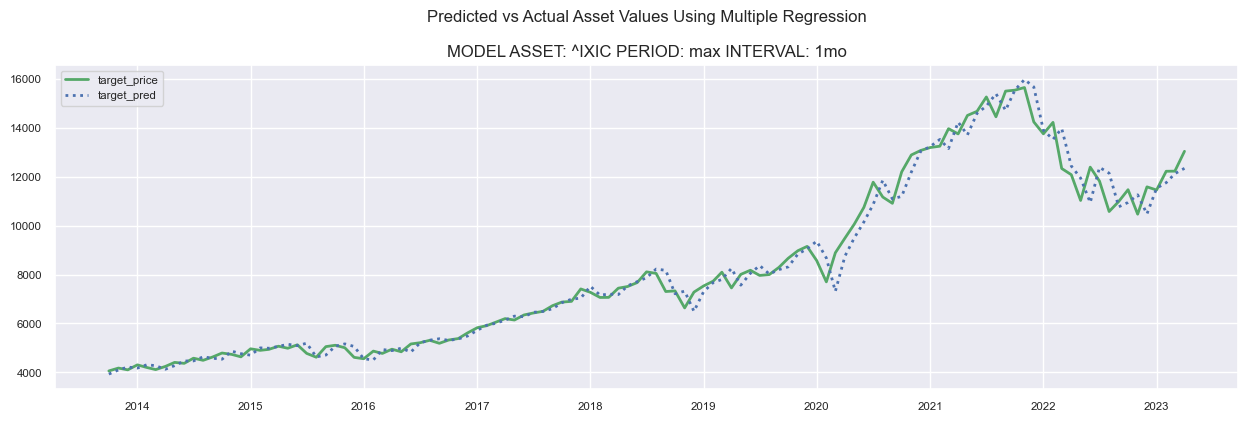


 

Feature, Target and Prediction Comparison: 
 
            open      high      low       close     volume        target_price  target_pred
date                                                                                       
2022-07-01  11006.83  12426.26  10911.45  12390.69   94293720000  11816.200     12381.614  
2022-08-01  12317.96  13181.09  11790.02  11816.20  110367680000  10575.620     12143.597  
2022-09-01  11707.44  12270.19  10572.33  10575.62   98888530000  10988.150     10768.671  
2022-10-01  10659.01  11230.44  10088.83  10988.15   98292380000  11468.000     10947.343  
2022-11-01  11154.74  11492.62  10262.93  11468.00  101572370000  10466.480     11258.413  
2022-12-01  11475.17  11571.64  10207.47  10466.48  100007430000  11584.550     10477.045  
2023-01-01  10562.06  11691.89  10265.04  11584.55  106732920000  11455.540     11527.609  
2023-02-01  11573.14  12269.55  11334.47  11455.54   99644100000  12221.910     11754.890  
2023-03-01  11447.58  12227.93

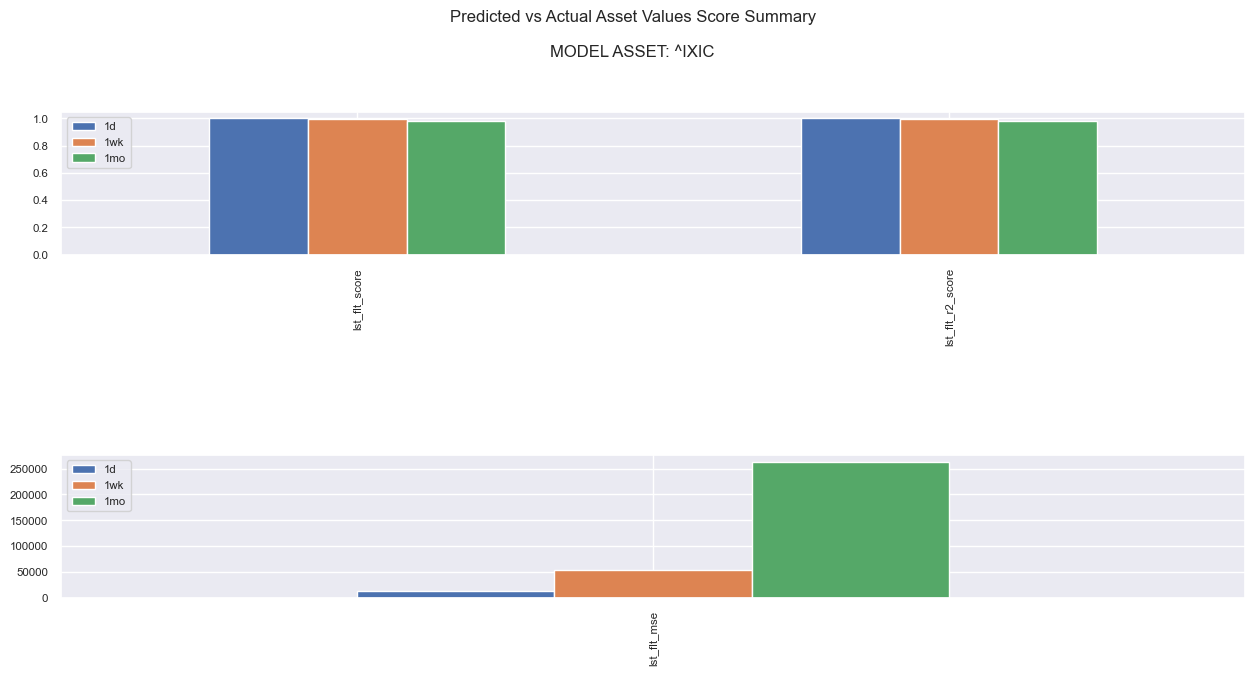


 

None


In [63]:
AssetData(str_co_ticker_1).run_mlr_model_list([str_co_ticker_1, str_co_ticker_2])

In [67]:
y_hat.predict(str_co_ticker_2).flatten()

NameError: name 'y_hat' is not defined


 
MODEL ASSET: NVDA PERIOD: max INTERVAL: 1d
FILE EXISTS: \Users\mfreese\Downloads\Side_work notes\Investment\NVDA-price-data-max-1d.csv UPDATE: NO
 

Model Coefficents: 
 
[-7.17150468e-02  1.30655892e-01  1.48618553e-01  7.94974764e-01
 -5.48361112e-11]
 

Model Intercept: 
 
0.00019500036927766473
 



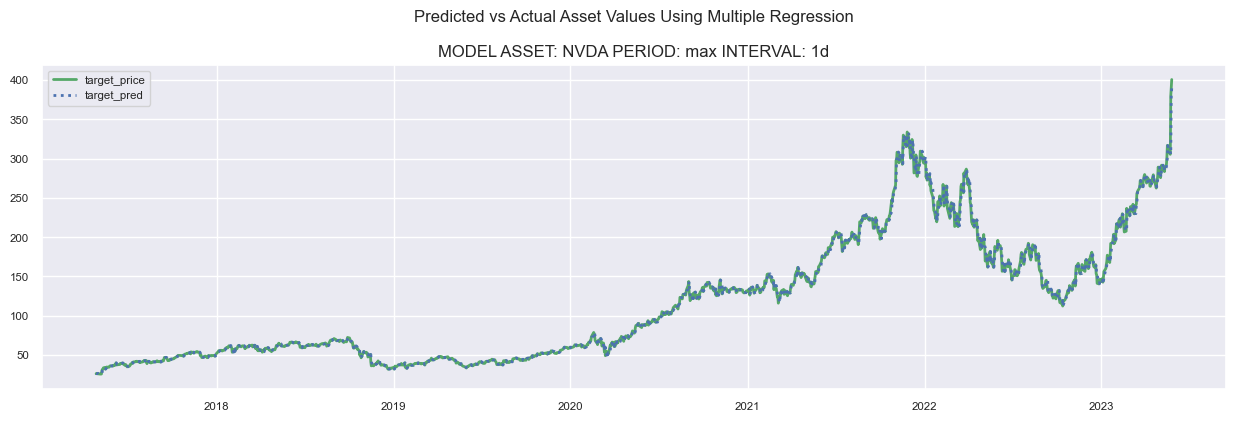


 

Feature, Target and Prediction Comparison: 
 
            open    high    low     close   volume     target_price  target_pred
date                                                                            
2023-05-15  285.08  289.69  281.52  289.53   29392600  292.130       289.412    
2023-05-16  288.41  298.70  288.32  292.13   44940500  301.780       293.427    
2023-05-17  295.84  301.99  294.30  301.78   43253500  316.780       301.884    
2023-05-18  304.10  318.28  303.20  316.78   74872500  312.640       316.666    
2023-05-19  315.36  315.80  309.16  312.64   47312400  311.760       313.131    
2023-05-22  309.01  315.20  306.80  311.76   37200000  306.880       312.458    
2023-05-23  310.00  312.88  306.31  306.88   35625300  305.380       308.131    
2023-05-24  302.10  306.07  298.06  305.38   72141900  379.800       305.388    
2023-05-25  385.23  394.80  366.35  379.80  154391100  389.460       380.326    
2023-05-26  378.90  391.70  375.50  389.46   71342900  400.

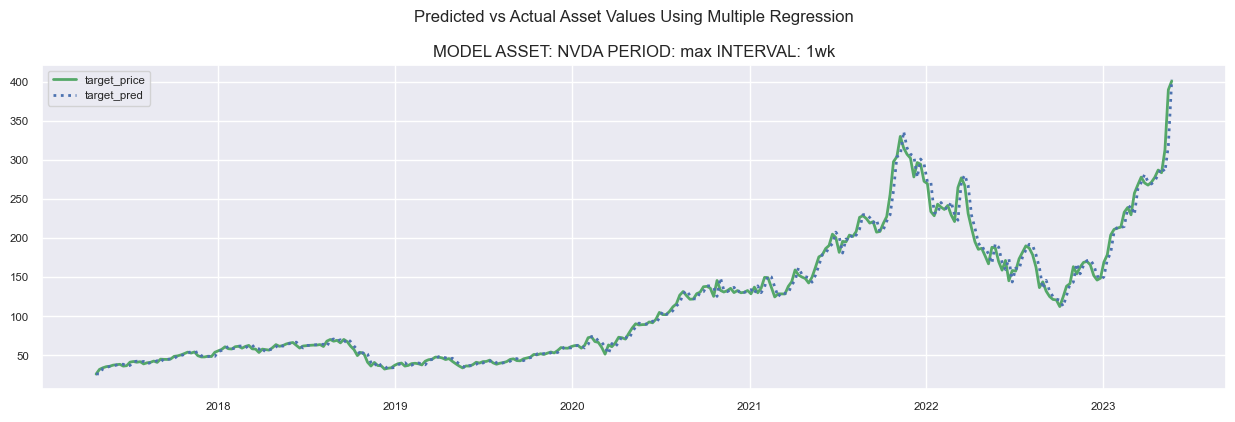


 

Feature, Target and Prediction Comparison: 
 
            open    high    low     close   volume     target_price  target_pred
date                                                                            
2023-03-20  256.15  275.89  251.30  267.79  279725900  277.770       270.762    
2023-03-27  268.37  278.34  258.50  277.77  190927300  270.370       281.346    
2023-04-03  275.09  280.00  263.95  270.37  167997700  267.580       271.766    
2023-04-10  268.23  277.90  262.20  267.58  190519100  271.190       268.986    
2023-04-17  265.65  281.10  264.33  271.19  205775900  277.490       273.003    
2023-04-24  270.13  277.58  262.25  277.49  179299400  286.800       280.650    
2023-05-01  278.40  290.58  272.40  286.80  203931000  283.400       289.789    
2023-05-08  285.22  292.20  280.46  283.40  162537400  312.640       284.708    
2023-05-15  285.08  318.28  281.52  312.64  239771500  389.460       317.901    
2023-05-22  309.01  394.80  298.06  389.46  370701200  400.

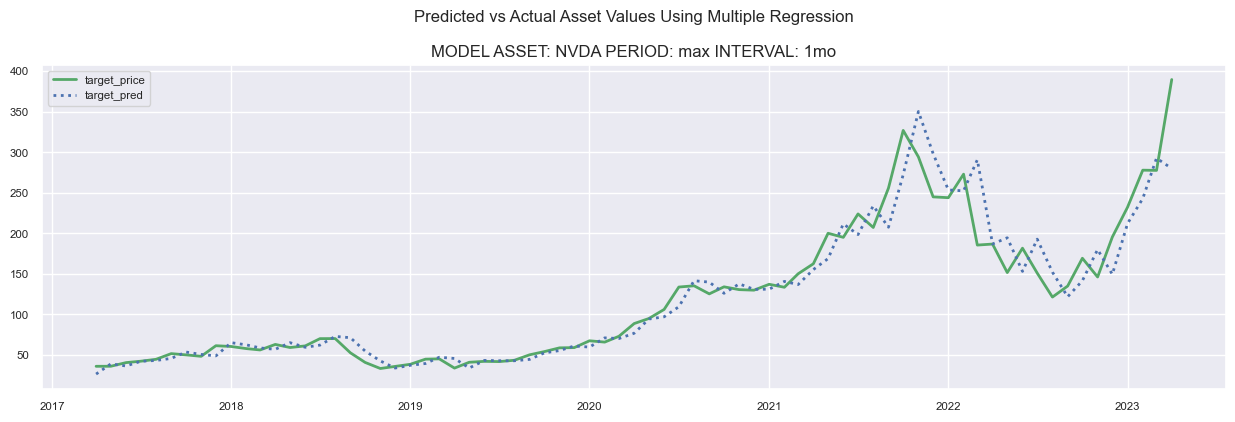


 

Feature, Target and Prediction Comparison: 
 
            open    high    low     close   volume      target_price  target_pred
date                                                                             
2022-07-01  148.99  182.44  140.55  181.63  1056447600  150.94        192.782    
2022-08-01  181.82  192.74  149.59  150.94  1206964800  121.39        152.117    
2022-09-01  142.09  145.47  119.46  121.39  1313057800  134.97        121.807    
2022-10-01  123.47  138.50  108.13  134.97  1254927700  169.23        141.538    
2022-11-01  138.11  169.98  129.56  169.23  1060060300  146.14        179.998    
2022-12-01  169.99  187.90  138.84  146.14   894615200  195.37        149.395    
2023-01-01  148.51  206.28  140.34  195.37   945496000  232.16        212.042    
2023-02-01  196.91  238.88  196.11  232.16  1039347900  277.77        242.789    
2023-03-01  231.92  278.34  222.97  277.77  1126373100  277.49        292.548    
2023-04-01  275.09  281.10  262.20  277.49   743

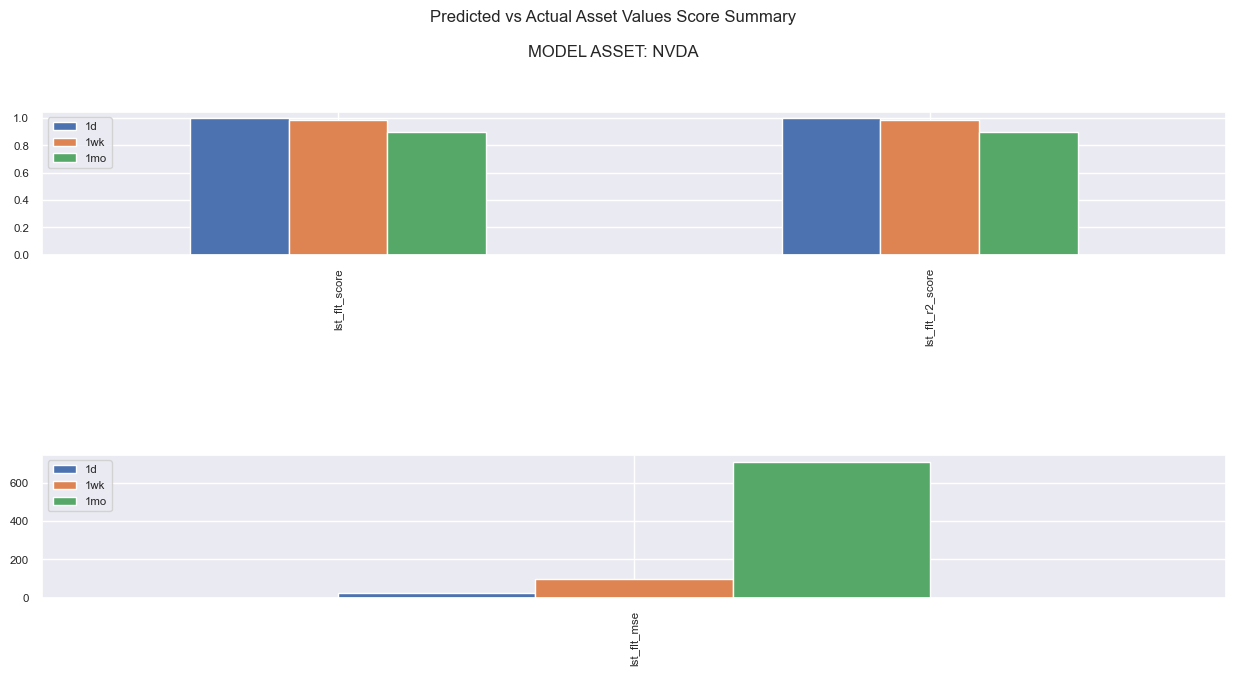

C:\Users\mfreese\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[ 26.49954285  39.04593092  36.47027953  42.24684029  43.26978357
  45.81052365  53.68659582  50.69841362  48.88556984  65.19630239
  62.52835488  58.7033485   57.01640793  65.1993739   59.54111908
  62.18245157  72.92005256  71.31281438  54.89100686  42.69830128
  33.9102778   37.29364271  39.52715651  47.23890514  45.75032418
  33.95962126  43.3373892   42.95409651  42.91831198  44.59913281
  52.58350346  55.48867628  61.13980641  59.74943568  71.13755013
  70.29630141  76.81408148  94.30648152  97.07596431 109.45463321
 141.55899653 139.8173777  126.05532311 137.65433807 130.86937385
 131.12979844 140.6922785  136.8400495  155.2972552  168.78825652
 211.57541075 198.43165581 233.85347143 207.45039728 272.2249123
 350.07759816 298.09546984 253.36887799 252.28462222 290.55557466
 186.80821581 194.46472273 153.02547189 192.78199275 152.11706975
 121.80695164 141.53789621 179.9984284  149.39497588 212.0421609
 242.78881355 292.54751404 279.83466604].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [93]:
AssetData(str_co_ticker_2).run_mlr_model_list([str_co_ticker_2])

# Pt. 2

In [2]:
import yfinance as yf

stock = yf.Ticker('NVDA')
stock_hist = stock.history(period='max')

In [3]:
stock_hist.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,0.401448,0.448045,0.356047,0.376358,271468800,0.0,0.0
1999-01-25 00:00:00-05:00,0.406227,0.420565,0.376358,0.415786,51048000,0.0,0.0
1999-01-26 00:00:00-05:00,0.420565,0.428929,0.377552,0.383527,34320000,0.0,0.0
1999-01-27 00:00:00-05:00,0.384721,0.394280,0.363215,0.382332,24436800,0.0,0.0
1999-01-28 00:00:00-05:00,0.382332,0.384721,0.378747,0.381137,22752000,0.0,0.0


<Axes: xlabel='Date'>

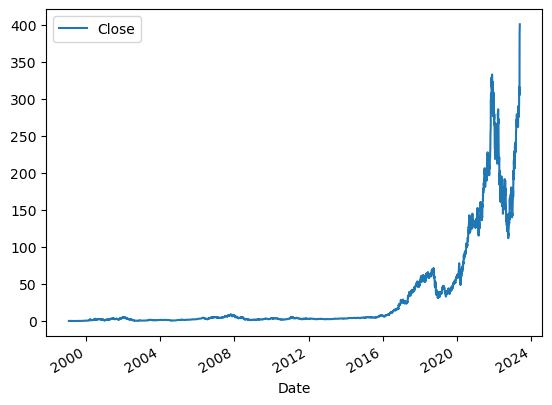

In [5]:
stock_hist.plot.line(y='Close', use_index=True)

In [7]:
data = stock_hist[['Close']]
data = data.rename(columns = {'Close':'Actual_Close'})

# 1 if price will go up tomorrow, 0 if it will go down
data['Target'] = stock_hist.rolling(2).apply(lambda x: x.iloc[1] > x.iloc[0])['Close']

In [8]:
stock_prev = stock_hist.copy()
stock_prev = stock_prev.shift(1)

In [10]:
stock_prev.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1999-01-22 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999-01-25 00:00:00-05:00,0.401448,0.448045,0.356047,0.376358,271468800.0,0.0,0.0
1999-01-26 00:00:00-05:00,0.406227,0.420565,0.376358,0.415786,51048000.0,0.0,0.0
1999-01-27 00:00:00-05:00,0.420565,0.428929,0.377552,0.383527,34320000.0,0.0,0.0
1999-01-28 00:00:00-05:00,0.384721,0.394280,0.363215,0.382332,24436800.0,0.0,0.0


In [11]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Create a random forest classification model.  Set min_samples_split high to ensure we don't overfit.
model = RandomForestClassifier(n_estimators=100, min_samples_split=200, random_state=1)

In [14]:
# Create our training data
predictors = ["Close", "Volume", "Open", "High", "Low"]
data = data.join(stock_prev[predictors]).iloc[1:]

In [15]:
train = data.iloc[:-100]
test = data.iloc[-100:]

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=200, random_state=1)

In [17]:
import pandas as pd
from sklearn.metrics import precision_score

# Evaluate error of predictions
preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.639344262295082

<Axes: xlabel='Date'>

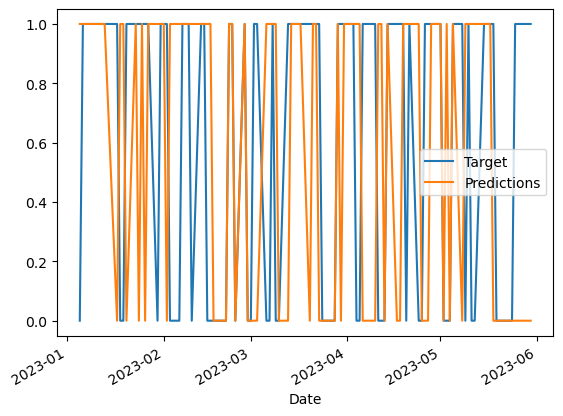

In [18]:
combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)
combined.plot()

In [19]:
# Backtesting

i = 1000
step = 750

train = data.iloc[0:i].copy()
test = data.iloc[i:(i+step)].copy()
model.fit(train[predictors], train["Target"])
preds = model.predict(test[predictors])

In [20]:
preds = model.predict_proba(test[predictors])[:,1]
preds = pd.Series(preds, index=test.index)
preds[preds > .6] = 1
preds[preds<=.6] = 0

In [21]:
preds.head()

Date
2003-01-16 00:00:00-05:00    0.0
2003-01-17 00:00:00-05:00    0.0
2003-01-21 00:00:00-05:00    0.0
2003-01-22 00:00:00-05:00    0.0
2003-01-23 00:00:00-05:00    0.0
dtype: float64

In [22]:
predictions = []
# Loop over the dataset in increments
for i in range(1000, data.shape[0], step):
    # Split into train and test sets
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()

    # Fit the random forest model
    model.fit(train[predictors], train["Target"])

    # Make predictions
    preds = model.predict_proba(test[predictors])[:,1]
    preds = pd.Series(preds, index=test.index)
    preds[preds > .6] = 1
    preds[preds<=.6] = 0

    # Combine predictions and test values
    combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)

    predictions.append(combined)

In [23]:
predictions[0].head()

,Target,Predictions
Date,,
2003-01-16 00:00:00-05:00,0.0,0.0
2003-01-17 00:00:00-05:00,0.0,0.0
2003-01-21 00:00:00-05:00,0.0,0.0
2003-01-22 00:00:00-05:00,1.0,0.0
2003-01-23 00:00:00-05:00,1.0,0.0


In [24]:
def backtest(data, model, predictors, start=1000, step=750):
    predictions = []
    # Loop over the dataset in increments
    for i in range(start, data.shape[0], step):
        # Split into train and test sets
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()

        # Fit the random forest model
        model.fit(train[predictors], train["Target"])

        # Make predictions
        preds = model.predict_proba(test[predictors])[:,1]
        preds = pd.Series(preds, index=test.index)
        preds[preds > .6] = 1
        preds[preds<=.6] = 0

        # Combine predictions and test values
        combined = pd.concat({"Target": test["Target"],"Predictions": preds}, axis=1)

        predictions.append(combined)

    return pd.concat(predictions)

In [25]:
predictions = backtest(data, model, predictors)

In [26]:
predictions["Predictions"].value_counts()

0.0    4968
1.0     159
Name: Predictions, dtype: int64

In [27]:
predictions["Target"].value_counts()

1.0    2679
0.0    2448
Name: Target, dtype: int64

In [28]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5157232704402516

In [29]:
weekly_mean = data.rolling(7).mean()["Close"]
quarterly_mean = data.rolling(90).mean()["Close"]
annual_mean = data.rolling(365).mean()["Close"]

In [30]:
weekly_trend = data.shift(1).rolling(7).sum()["Target"]

In [31]:
data["weekly_mean"] = weekly_mean / data["Close"]
data["quarterly_mean"] = quarterly_mean / data["Close"]
data["annual_mean"] = annual_mean / data["Close"]

In [32]:
data["annual_weekly_mean"] = data["annual_mean"] / data["weekly_mean"]
data["annual_quarterly_mean"] = data["annual_mean"] / data["quarterly_mean"]

In [33]:
data["weekly_trend"] = weekly_trend

In [34]:
data["open_close_ratio"] = data["Open"] / data["Close"]
data["high_close_ratio"] = data["High"] / data["Close"]
data["low_close_ratio"] = data["Low"] / data["Close"]

In [38]:
full_predictors = predictors + ["weekly_mean", "quarterly_mean", "annual_mean", "annual_weekly_mean", "annual_quarterly_mean", "open_close_ratio", "high_close_ratio", "low_close_ratio"]


In [39]:
predictions = backtest(data.iloc[365:], model, full_predictors)

In [40]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5210727969348659

In [41]:
predictions["Predictions"].value_counts()

0.0    4501
1.0     261
Name: Predictions, dtype: int64

<Axes: xlabel='Date'>

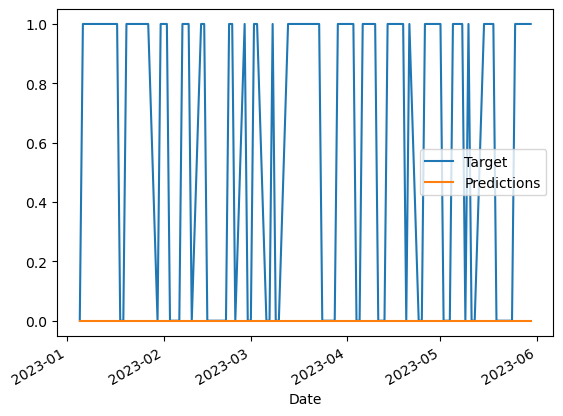

In [42]:
predictions.iloc[-100:].plot()

Next steps
We've come far in this project! So far, we have:

Downloaded data for a stock
Cleaned and explored the data
Created a machine learning model
Created a backtesting function
Improved our predictions
We now have a model that we can continue to build on and tweak. The biggest area we can tweak is to continue to improve the accuracy of our predictions.

There are a lot of next steps we could take:

Improve the technique

Calculate how much money you'd make if you traded with this algorithm
Improve the algorithm

Run with a reduced step size! This will take longer, but increase accuracy
Try discarding older data (only keeping data in a certain window)
Try a different machine learning algorithm
Tweak random forest parameters, or the prediction threshold
Add in more predictors

Add in intraday trading day
See if you can add in hourly trends from the day before
Account for activity post-close and pre-open
Early trading
Trading on other exchanges that open before the NYSE (to see what the global sentiment is)
Economic indicators
Interest rates
Other important economic news
Key dates
Dividends
External factors like elections
Company milestones
Earnings calls
Analyst ratings
Major announcements
Prices of related stocks
Other companies in the same sector
Key partners, customers, etc.
Hopefully this project has been helpful, and you now have something you can add to your portfolio. As you build out your project, I'd recommend ensuring that you document your key choices, and explain to the reader why you made the choices you did. You can see an example of this completed project for inspiration.

Stay tuned for more project walkthrough posts!
